
## 1.For whole of the data



The Path:
* A ) Load & Preprocess Data ✅
    - Remove duplicates, handle missing values
    - Create datetime features (hour, weekday, etc.)
*    ↓
* B ) Feature Engineering ✅
    - Add lag features, rolling stats, trend, etc.
*    ↓
* C ) Train/Validation/Test Split ✅
    - Based on **time** (e.g., past year = train, recent months = test)
*    ↓
* D ) Feature Selection (Correlation + Granger) ✅
    - Only on **training data** to prevent data leakage!
*    ↓
* E ) Standardization or Normalization ✅
    - Fit scaler on **training data only**
    - Apply to all splits (train/val/test)
*    ↓
* F ) Model Training (with uncertainty method)
    - Example: Deep Ensemble, MC Dropout, or Quantile Regression
*    ↓
* G ) Prediction + Uncertainty Estimation
    - Predict energy + uncertainty interval (mean ± std or quantiles)
*    ↓
* H ) Evaluation (Accuracy + Uncertainty)
    - MAE, RMSE + Calibration, CRPS, or coverage %
*    ↓
* I ) Visualization & Export
    - Plot predictions, uncertainty bounds, and export results

## * A ) Load & Preprocess Data ✅

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_parquet("dataset_0.parquet")
# Remove timezone info from the datetime column
df["datetime"] = df["datetime"].dt.tz_localize(None)
# Save to Excel
df.to_excel("0_weather_data_testing_0.xlsx", index=False)
print("Excel file saved successfully.")
print(f"Testing data shape is {df.shape} and number of rows are ({len(df)}).")

################################################################
df = pd.read_parquet("dataset_1.parquet")
# Remove timezone info from the datetime column
df["datetime"] = df["datetime"].dt.tz_localize(None)
# Save to Excel
df.to_excel("1_weather_data_validation_1.xlsx", index=False)
print("Excel file saved successfully.")
print(f"Validation data shape is {df.shape} and number of rows are ({len(df)}).")

################################################################

df_Train = pd.read_parquet("dataset_2.parquet")
# Remove timezone info from the datetime column
df_Train["datetime"] = df_Train["datetime"].dt.tz_localize(None)
# Save to Excel
df_Train.to_excel("2_weather_data_training_2.xlsx", index=False)
print("Excel file saved successfully.")
print(f"Training data shape is {df_Train.shape} and number of rows are ({len(df_Train)}).")


df.isnull().sum()
# Load your data
df = pd.read_parquet("dataset_2.parquet")
# Check full data types
print(" Full Data Types:")
print(df.dtypes)
# Separate columns by type
datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
# Show results
print("\n Datetime Columns:", datetime_cols)
print(" Numerical Columns:", numerical_cols)
print(" Categorical Columns:", categorical_cols)

Excel file saved successfully.
Testing data shape is (2208, 16) and number of rows are (2208).
Excel file saved successfully.
Validation data shape is (5856, 16) and number of rows are (5856).
Excel file saved successfully.
Training data shape is (11712, 16) and number of rows are (11712).
 Full Data Types:
datetime                 datetime64[us, UTC]
air_temperature                      float64
cloud_amount                         float64
dewpoint_temperature                 float64
diffuse_r                            float64
elspot                               float64
energy                               float64
full_solar                           float64
global_r                             float64
gust_speed                           float64
horizontal_visibility                float64
pressure                             float64
relative_humidity                    float64
sunshine                             float64
wind_direction                       float64
wind_speed      

* A ) Load & Preprocess Data ✅
*    ↓
* B ) Feature Engineering    
*    ↓
* C ) Feature Selection (Correlation + Granger)
*    ↓
* D ) Train/Val/Test Split  
*    ↓
* E ) Standardization (after split!)
*    ↓
* F ) Model Training (with uncertainty method)
*    ↓
* G ) Prediction + Uncertainty Estimation
*   ↓
* H ) Evaluation (accuracy + uncertainty)
*    ↓
* I ) Visualization & Export

## * B and C ) Feature Engineering    ✅

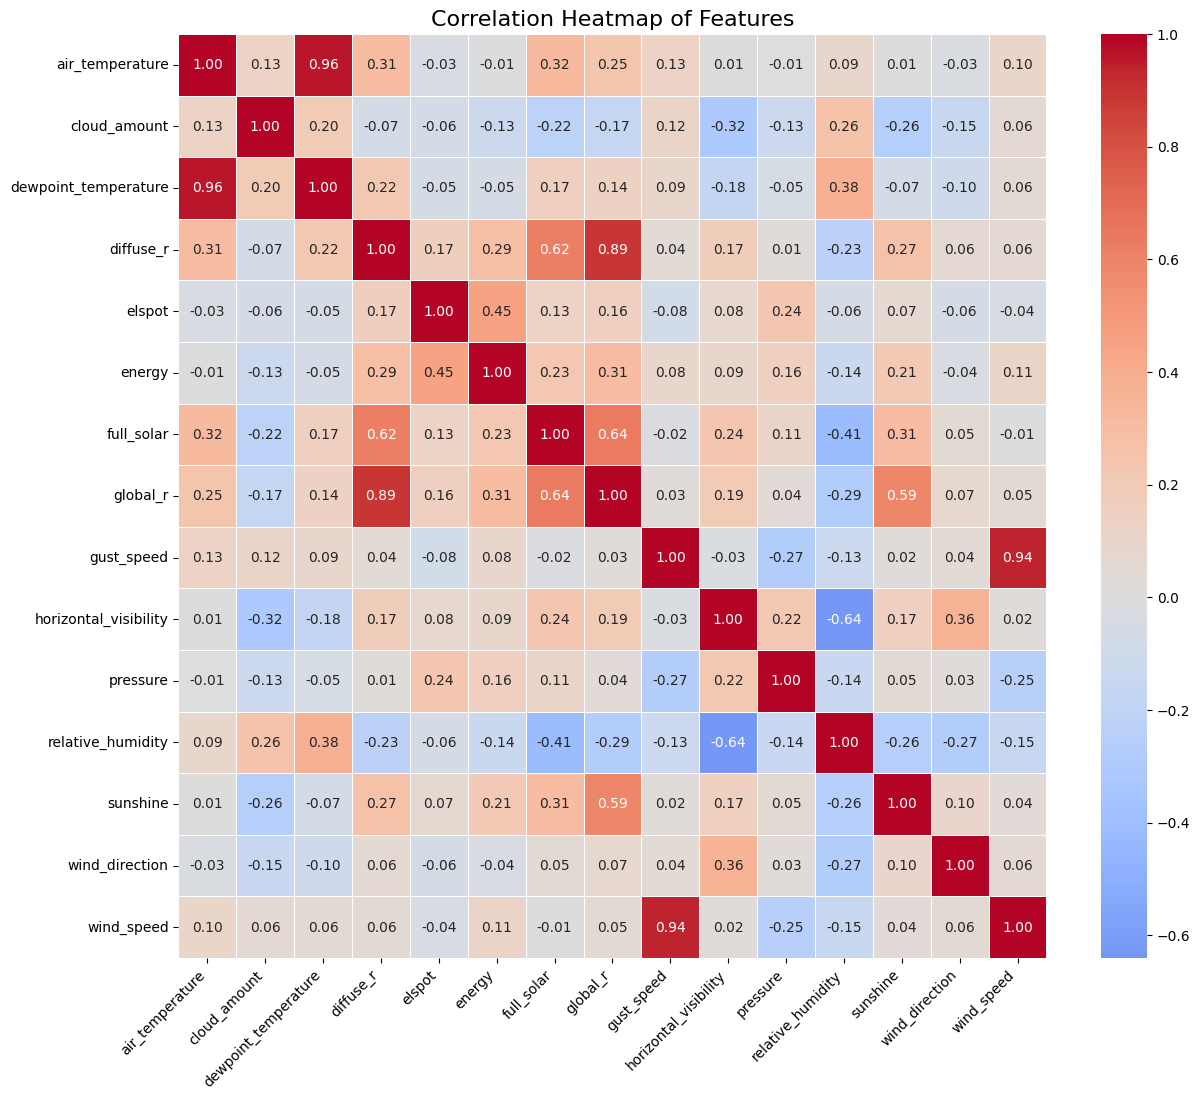

cloud_amount             529
full_solar               503
global_r                 380
diffuse_r                379
elspot                   164
relative_humidity        154
pressure                 127
sunshine                  85
wind_speed                41
dewpoint_temperature      14
air_temperature           13
gust_speed                 9
datetime                   0
energy                     0
horizontal_visibility      0
wind_direction             0
dtype: int64
cloud_amount             138
sunshine                  73
global_r                  71
full_solar                63
diffuse_r                 61
elspot                    45
relative_humidity         37
wind_speed                12
air_temperature            6
dewpoint_temperature       3
gust_speed                 2
energy                     0
horizontal_visibility      0
pressure                   0
wind_direction             0
dtype: int64


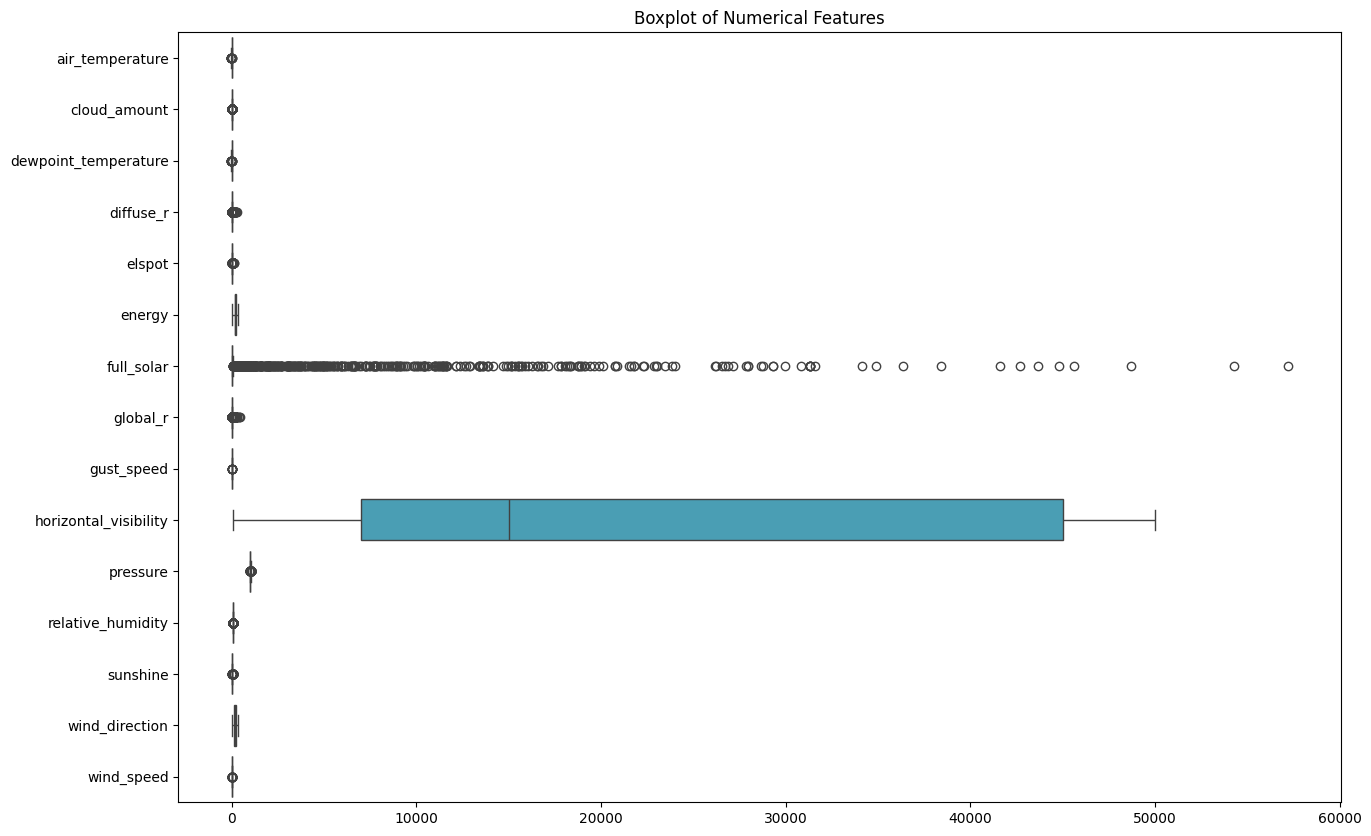

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Assuming you already have the DataFrame loaded and processed
df = pd.read_parquet("dataset_0.parquet")
df_numeric = df.drop(columns=["datetime"])
corr = df_numeric.corr()

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Save to file
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()
df.corr()

import pandas as pd

# Assuming df is your DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum().sort_values(ascending=False)
print(outlier_counts)

z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)
outliers_z = (z_scores.abs() > 3)
outlier_counts_z = outliers_z.sum().sort_values(ascending=False)
print(outlier_counts_z)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot all features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include='number'), orient="h")
plt.title("Boxplot of Numerical Features")

# Save before showing
plt.savefig("Boxplot of Numerical Features.png", dpi=300, bbox_inches='tight')
plt.show()



* Starting date: 2018-11-16
* Ending date: 2020-03-14
* Number of days: 484
* Number of months: 16

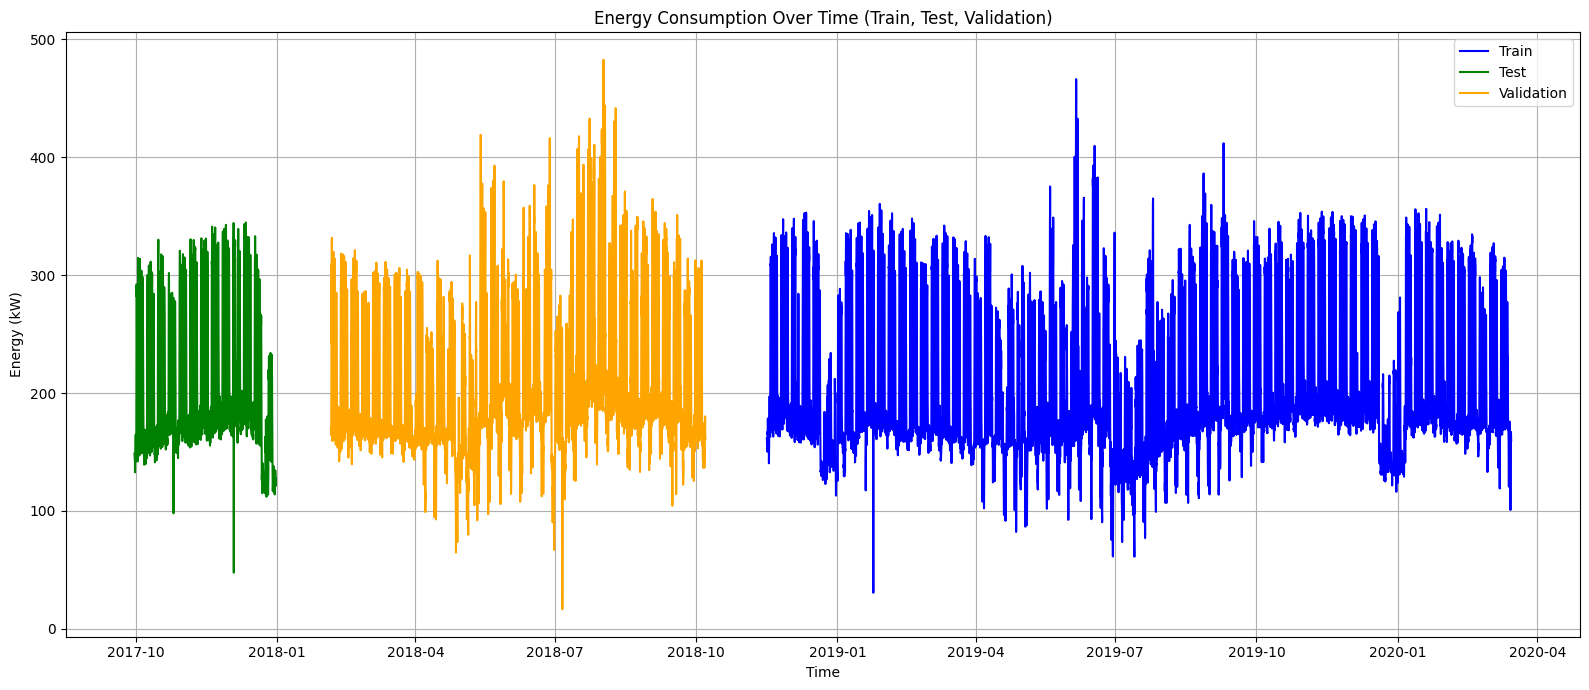

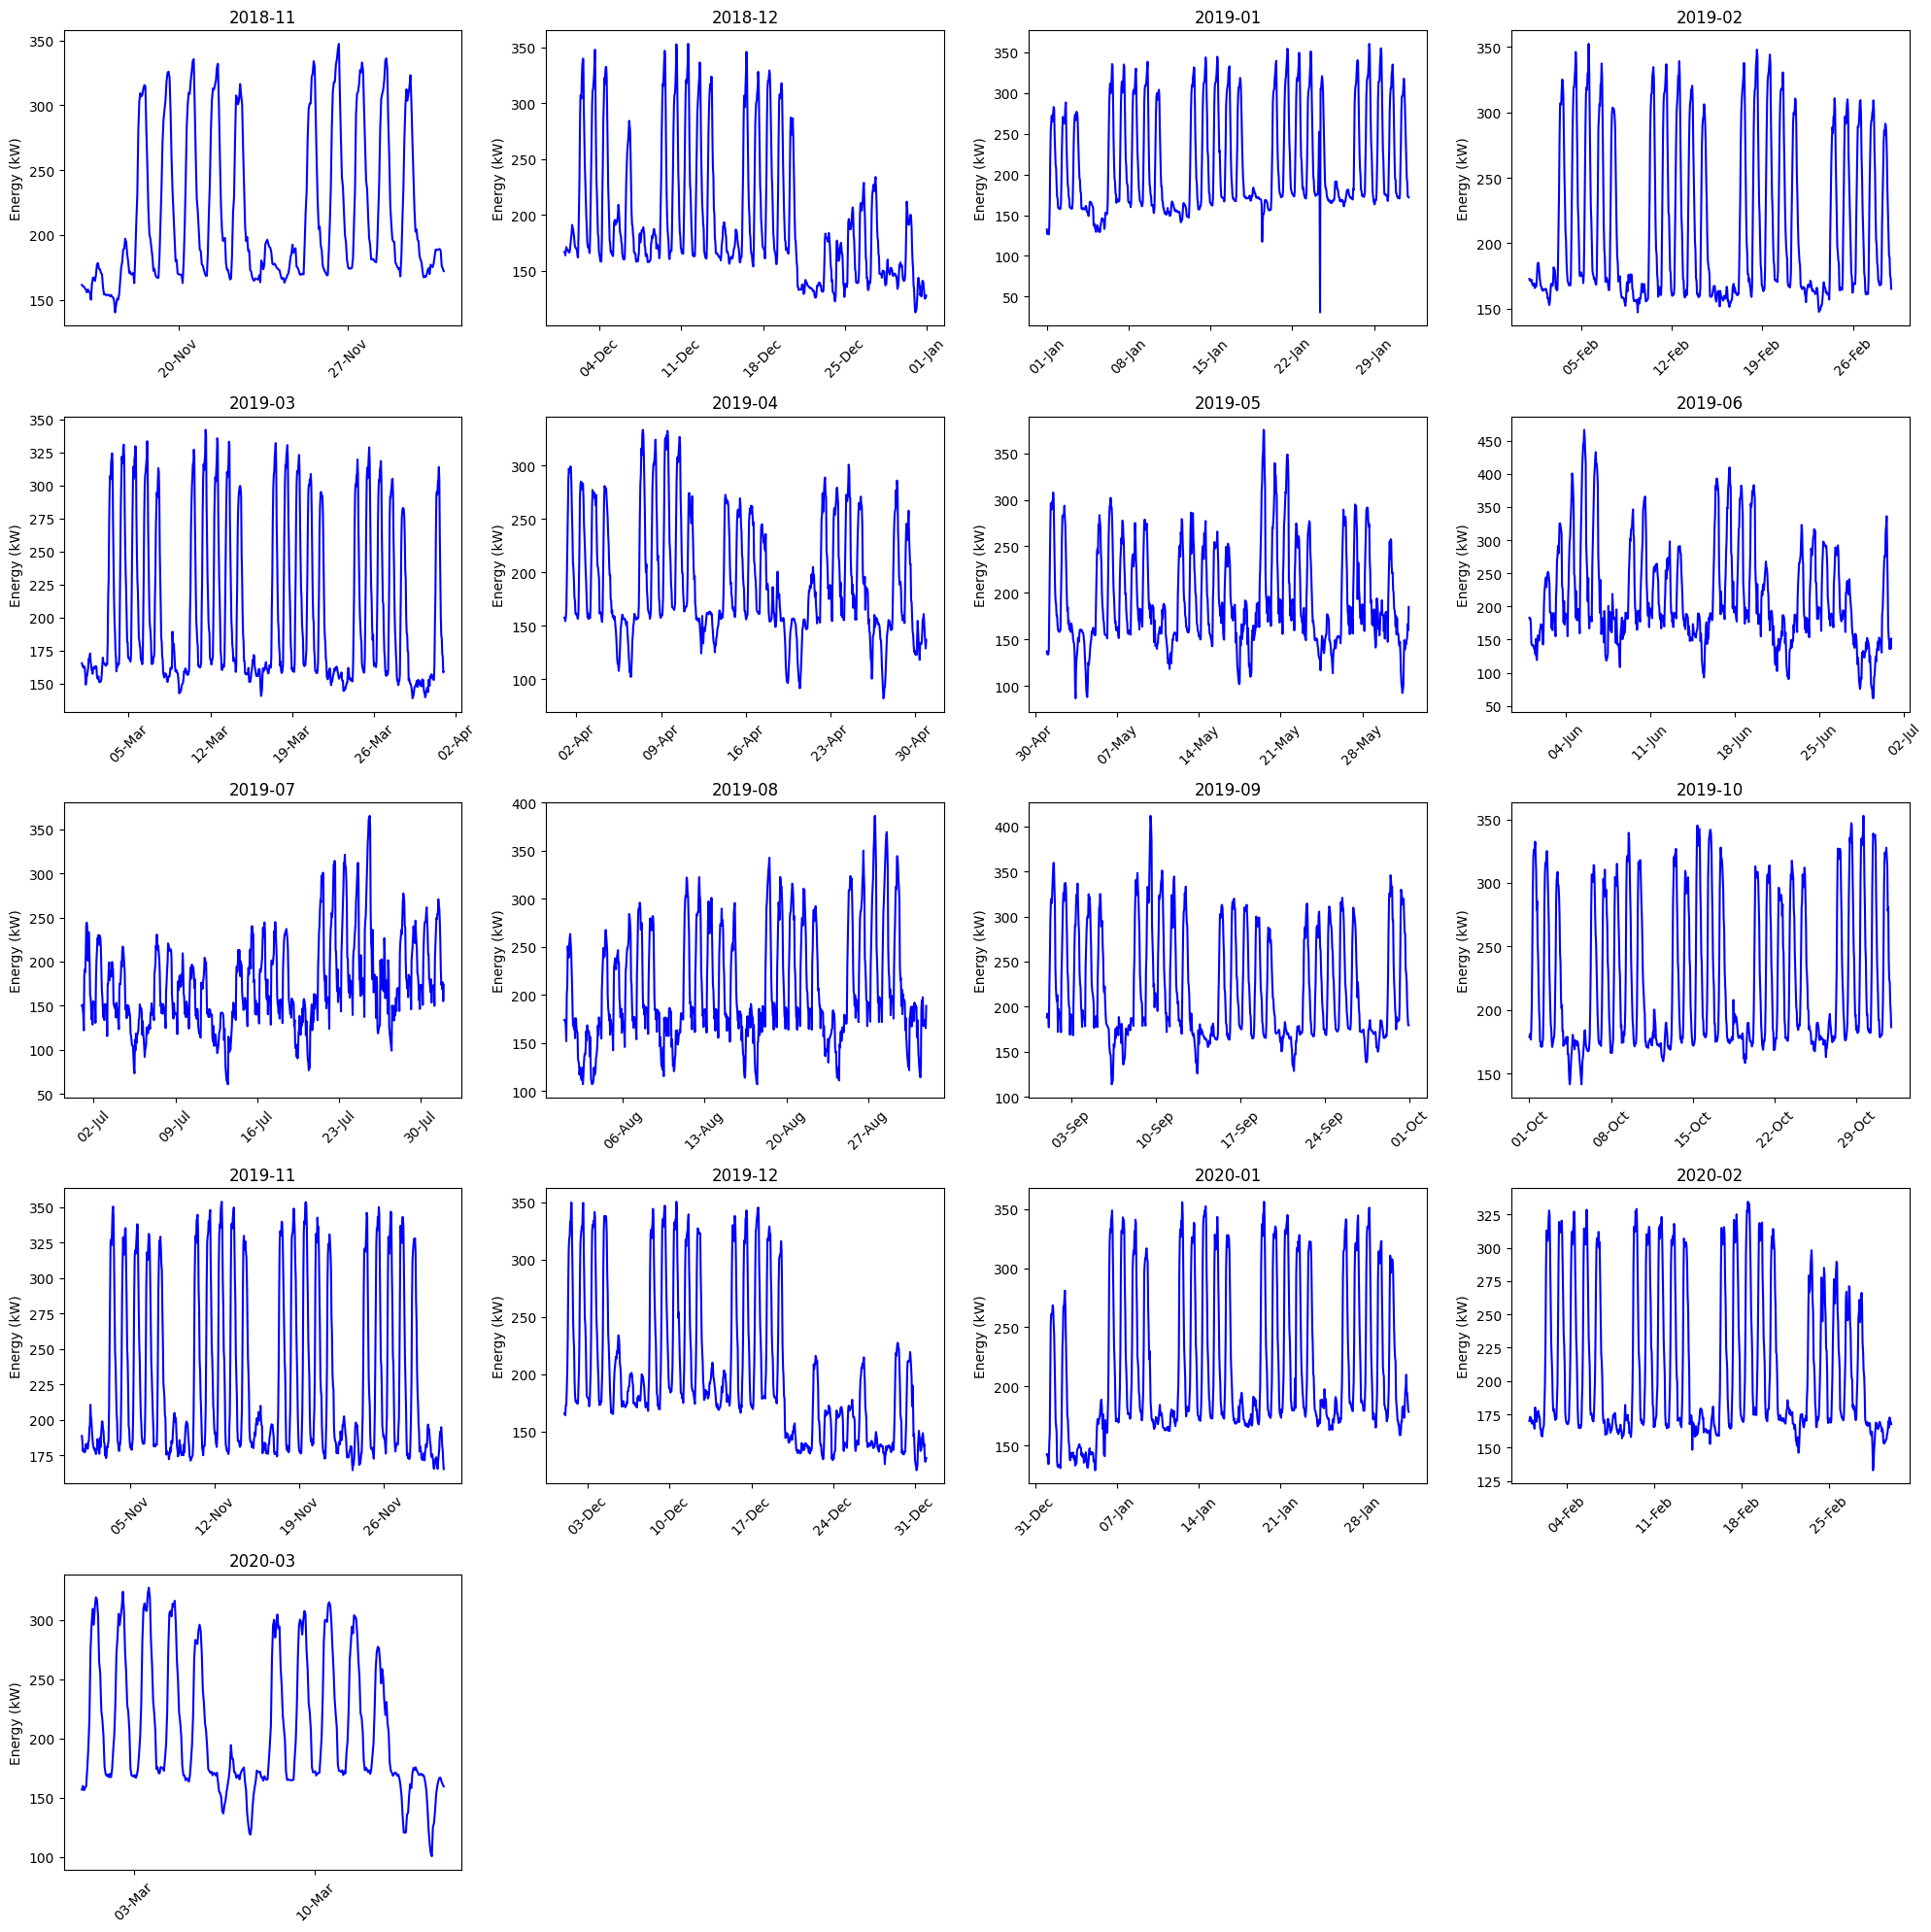

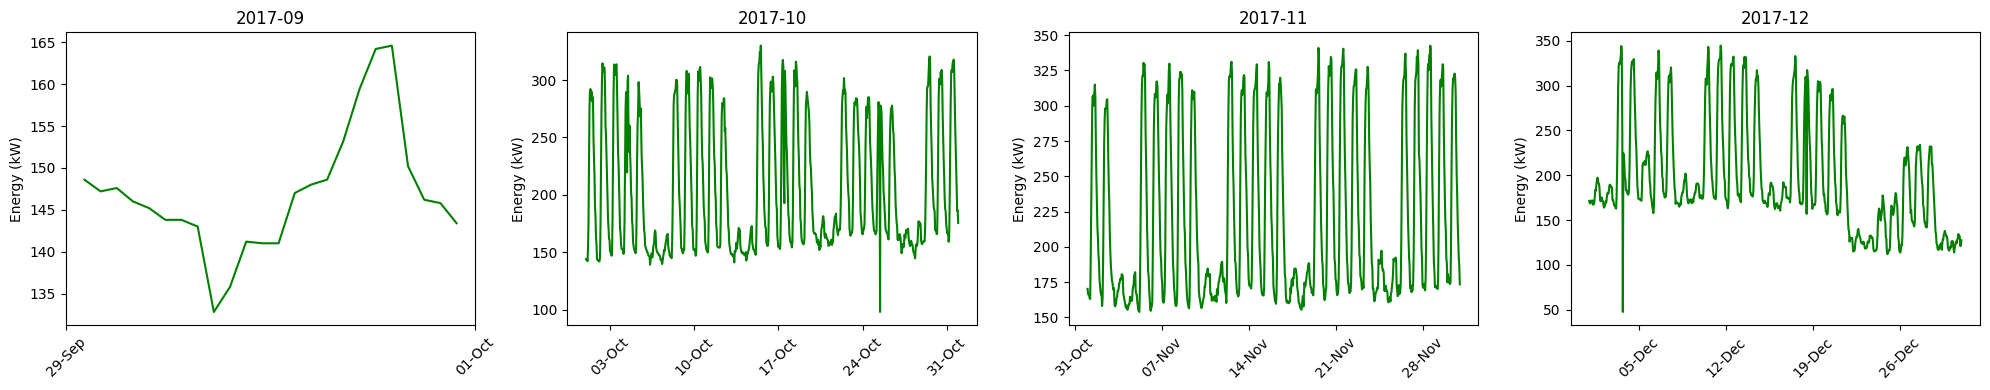

In [3]:


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load each Excel file
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")
df_Test = pd.read_excel("0_weather_data_testing_0.xlsx")
df_Val = pd.read_excel("1_weather_data_validation_1.xlsx")

# Convert 'datetime' column to datetime type
df_Train['datetime'] = pd.to_datetime(df_Train['datetime'])
df_Test['datetime'] = pd.to_datetime(df_Test['datetime'])
df_Val['datetime'] = pd.to_datetime(df_Val['datetime'])

# Plot all three datasets
plt.figure(figsize=(16, 7))
plt.plot(df_Train['datetime'], df_Train['energy'], label='Train', color='blue')
plt.plot(df_Test['datetime'], df_Test['energy'], label='Test', color='green')
plt.plot(df_Val['datetime'], df_Val['energy'], label='Validation', color='orange')

# Formatting
plt.xlabel('Time')
plt.ylabel('Energy (kW)')
plt.title('Energy Consumption Over Time (Train, Test, Validation)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # ✅ import for handling date axes

# Load the Excel file
file_path = "2_weather_data_training_2.xlsx"
df_Train = pd.read_excel(file_path)

# Convert the 'datetime' column to datetime type
df_Train['datetime'] = pd.to_datetime(df_Train['datetime'])

# Set datetime as index for easier filtering
df_Train.set_index('datetime', inplace=True)

# Determine how many unique months we have
unique_months = df_Train.groupby([df_Train.index.year, df_Train.index.month]).ngroups
ncols = 4
nrows = (unique_months + ncols - 1) // ncols  # ceiling division

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axs = axs.flatten()

# Loop through each month and plot energy vs. time
for i, ((year, month), group) in enumerate(df_Train.groupby([df_Train.index.year, df_Train.index.month])):
    axs[i].plot(group.index, group['energy'], color='blue')
    axs[i].set_title(f"{year}-{month:02d}")
    axs[i].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Energy (kW)')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Layout and display
plt.tight_layout()
plt.show()

# Load the Excel file
file_path = "0_weather_data_testing_0.xlsx"
df_Test = pd.read_excel(file_path)

# Convert the 'datetime' column to datetime type
df_Test['datetime'] = pd.to_datetime(df_Test['datetime'])

# Set datetime as index for easier filtering
df_Test.set_index('datetime', inplace=True)

# Determine how many unique months we have
unique_months = df_Test.groupby([df_Test.index.year, df_Test.index.month]).ngroups
ncols = 4
nrows = (unique_months + ncols - 1) // ncols  # ceiling division

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axs = axs.flatten()

# Loop through each month and plot energy vs. time
for i, ((year, month), group) in enumerate(df_Test.groupby([df_Test.index.year, df_Test.index.month])):
    axs[i].plot(group.index, group['energy'], color='green')
    axs[i].set_title(f"{year}-{month:02d}")
    axs[i].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Energy (kW)')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Layout and display
plt.tight_layout()
plt.show()


| Method                 | Type              | Pros                           | Notes                        |
| ---------------------- | ----------------- | ------------------------------ | ---------------------------- |
| Correlation            | Statistical       | Fast, interpretable            | Linear only                  |
| RandomForest / XGBoost | Model-based       | Captures nonlinearity          | Needs fitting                |
| Permutation Importance | Model-based       | Measures real performance drop | Slower                       |
| SHAP                   | Model-based       | Very detailed and visual       | Requires SHAP lib            |
| RFE                    | Wrapper method    | Finds minimal sets             | Slower                       |
| Granger Causality      | Time-series stats | Causal inference               | Only for time-series columns |
*
*
*

| Feature Selection Method                       | Requires Model Training? | Usable Before Model Training? | Explanation                                                                     |
| ---------------------------------------------- | ------------------------ | ----------------------------- | ------------------------------------------------------------------------------- |
| ✅ **Correlation**                              | ❌ No                     | ✅ Yes                         | Fastest statistical method to filter irrelevant features (linear relationships) |
| ✅ **Granger Causality**                        | ❌ No                     | ✅ Yes                         | Used for time series to detect causality before modeling                        |
| ⚠️ **RFE (Recursive Feature Elimination)**     | ✅ Yes                    | ❌ No                          | Internally trains a model multiple times to eliminate features                  |
| ✅ **Univariate Selection** (e.g. chi², f-test) | ❌ No                     | ✅ Yes                         | Good for initial filtering, mostly for classification tasks                     |
| ❌ **Random Forest Importance**                 | ✅ Yes                    | ❌ No                          | Only available after fitting the model                                          |
| ❌ **Permutation Importance**                   | ✅ Yes                    | ❌ No                          | Requires a trained model to test performance drop per feature                   |
| ❌ **SHAP Values**                              | ✅ Yes                    | ❌ No                          | Used for post-training interpretability of feature impact                       |


In [4]:
import pandas as pd
# Load your data
df = pd.read_excel("2_weather_data_training_2.xlsx")
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
# Extract time-based features
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month
df['dayofyear'] = df['datetime'].dt.dayofyear
# Drop datetime for correlation analysis
df_corr = df.drop(columns=['datetime'])

# Compute correlations with 'energy'
correlations = df_corr.corr()['energy'].sort_values(ascending=False)

# Show top correlated features
print(correlations)





energy                   1.000000
elspot                   0.269041
diffuse_r                0.213942
global_r                 0.164275
full_solar               0.133066
sunshine                 0.114353
gust_speed               0.099666
hour                     0.091374
wind_speed               0.083593
air_temperature          0.035364
cloud_amount             0.033265
pressure                 0.024049
dewpoint_temperature     0.010044
wind_direction           0.001989
month                   -0.001882
dayofyear               -0.004957
horizontal_visibility   -0.021983
relative_humidity       -0.055665
weekday                 -0.248812
Name: energy, dtype: float64


step one: selected_features Based on the correlation

In [5]:
selected_features1 = [
    'elspot',          # +0.269 → strong positive correlation
    'diffuse_r',       # +0.214 → solar radiation (diffuse)
    'global_r',        # +0.164 → solar radiation (global)
    'full_solar',      # +0.133 → total solar energy
    'sunshine',        # +0.114 → limited reliability, moderate correlation (optional)
    'gust_speed',      # +0.100 → slight positive correlation (optional)
    'hour',            # +0.091 → weak, but useful for temporal patterns
    'weekday'          # –0.249 → strong negative correlation (very useful!)
]

| Feature                | Lag 1        | Lag 2        | Lag 3        | Granger-Causal? |
| ---------------------- | ------------ | ------------ | ------------ | --------------- |
| `air_temperature`      | 0.0527 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `diffuse_r`            | **0.0089** ✅ | **0.0000** ✅ | **0.0000** ✅ | ✅               |
| `dewpoint_temperature` | 0.1055 ❌     | **0.0237** ✅ | 0.0797 ❌     | ✅ (weak)        |
| `elspot`               | 0.3541 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `full_solar`           | 0.7152 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `global_r`             | **0.0000** ✅ | **0.0000** ✅ | **0.0000** ✅ | ✅               |
| `gust_speed`           | 0.2062 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `pressure`             | **0.0000** ✅ | 0.2743 ❌     | **0.0207** ✅ | ✅               |
| `relative_humidity`    | **0.0001** ✅ | **0.0000** ✅ | **0.0000** ✅ | ✅               |
| `wind_direction`       | 0.6085 ❌     | 0.3092 ❌     | **0.0187** ✅ | ✅ (only lag 3)  |
| `wind_speed`           | 0.297 ❌      | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |
| `hour`                 | **0.0000** ✅ | **0.0000** ✅ | **0.0000** ✅ | ✅               |
| `weekday`              | **0.0004** ✅ | **0.0013** ✅ | **0.0002** ✅ | ✅               |
| `sunshine`             | 0.9836 ❌     | **0.0000** ✅ | **0.0000** ✅ | ✅ (from lag 2)  |

❌ Not Granger-Causal (All p > 0.05):
| Feature                 | Reason       |
| ----------------------- | ------------ |
| `cloud_amount`          | All p > 0.70 |
| `horizontal_visibility` | All p > 0.07 |
| `month`                 | All p > 0.21 |
| `dayofyear`             | All p > 0.20 |


In [6]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load your Excel file
df = pd.read_excel("2_weather_data_training_2.xlsx")

# Convert datetime column and set it as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Create time-based features
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear

# Get all columns except the target variable
features_to_test = [col for col in df.columns if col != 'energy']

# Dictionary to store p-values of Granger test
granger_results = {}

# Run Granger causality test for each feature
for feature in features_to_test:
    try:
        # Drop missing values
        data = df[[feature, 'energy']].dropna()

        # Perform Granger test (maxlag = 3)
        result = grangercausalitytests(data, maxlag=3)


        # Extract p-values from SSR F-test
        p_values = [round(result[lag][0]['ssr_ftest'][1], 4) for lag in range(1, 4)]

        # Store the result
        granger_results[feature] = p_values
    except Exception as e:
        granger_results[feature] = [f"Error: {str(e)}"] * 3

# Print the results
print("Granger Causality Test (p-values for lags 1 to 3):\n")
print(f"{'Feature':<25} {'Lag 1':<10} {'Lag 2':<10} {'Lag 3':<10}")
print("-" * 60)
for feature, pvals in granger_results.items():
    print(f"{feature:<25} {pvals[0]:<10} {pvals[1]:<10} {pvals[2]:<10}")



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7545  , p=0.0527  , df_denom=11708, df_num=1
ssr based chi2 test:   chi2=3.7555  , p=0.0526  , df=1
likelihood ratio test: chi2=3.7549  , p=0.0527  , df=1
parameter F test:         F=3.7545  , p=0.0527  , df_denom=11708, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=109.2857, p=0.0000  , df_denom=11705, df_num=2
ssr based chi2 test:   chi2=218.6648, p=0.0000  , df=2
likelihood ratio test: chi2=216.6483, p=0.0000  , df=2
parameter F test:         F=109.2857, p=0.0000  , df_denom=11705, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=76.6401 , p=0.0000  , df_denom=11702, df_num=3
ssr based chi2 test:   chi2=230.0578, p=0.0000  , df=3
likelihood ratio test: chi2=227.8269, p=0.0000  , df=3
parameter F test:         F=76.6401 , p=0.0000  , df_denom=11702, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1451  

Step two feature selection based on features_Granger

In [7]:
selected_features_Granger = [
    'air_temperature',
    'diffuse_r',
    'dewpoint_temperature',
    'elspot',
    'full_solar',
    'global_r',
    'gust_speed',
    'pressure',
    'relative_humidity',
    'wind_direction',
    'wind_speed',
    'hour',
    'weekday',
    'sunshine'
]


| Feature                | Correlation   | Granger Causality | Use?     |
|------------------------|---------------|--------------------|----------|
| air_temperature        | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| cloud_amount           | ❌ Very Low    | ❌ No               | ❌ Drop   |
| dewpoint_temperature   | ❌ Very Low    | ✅ Lag 2            | ✅ Maybe  |
| diffuse_r              | ✅ Medium      | ✅ All Lags         | ✅ Keep   |
| elspot                 | ✅ Medium      | ✅ Lag 2–3          | ✅ Keep   |
| full_solar             | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| global_r               | ✅ Medium      | ✅ All Lags         | ✅ Keep   |
| gust_speed             | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| horizontal_visibility  | ❌ Near Zero   | ❌ Weak             | ❌ Drop   |
| pressure               | ❌ Very Low    | ✅ Lag 1/3          | ✅ Maybe  |
| relative_humidity      | ❌ Negative    | ✅ All Lags         | ✅ Keep   |
| sunshine               | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| wind_direction         | ❌ Near Zero   | ✅ Lag 3            | ✅ Maybe  |
| wind_speed             | ✅ Low         | ✅ Lag 2–3          | ✅ Keep   |
| hour                   | ✅ Medium      | ✅ All Lags         | ✅ Keep   |
| weekday                | ❌ Negative    | ✅ All Lags         | ✅ Keep   |
| month                  | ❌ Negative    | ❌ No               | ❌ Drop   |
| dayofyear              | ❌ Negative    | ❌ No               | ❌ Drop   |


End selected features

In [8]:
# Selected features for energy prediction
selected_features = [
    'air_temperature',       # importance ≈ 3.5%   (✅ required)
    'diffuse_r',             # importance ≈ 21.4%  (✅ required)
    'elspot',                # importance ≈ 26.9%  (✅ required)
    'full_solar',            # importance ≈ 13.3%  (✅ required)
    'global_r',              # importance ≈ 16.4%  (✅ required)
    'gust_speed',            # importance ≈ 9.9%   (⚠️ optional)
    'relative_humidity',     # importance ≈ 5.6%   (⚠️ optional)
    'sunshine',              # importance ≈ 11.4%  (⚠️ optional)
    'wind_speed',            # importance ≈ 8.4%   (⚠️ optional)
    'hour',                  # importance ≈ 9.1%   (✅ required)
    'weekday',               # importance ≈ 24.9%  (✅ required, despite negative correlation)
]



=== Outlier & Range Analysis ===

📌 Feature: air_temperature
  ➤ Min value     : -25.600
  ➤ Max value     : 30.000
  ➤ Mean ± Std    : 3.75 ± 8.72
  ⚠ Outliers found: 8
    Outlier values (first 5): [-23.9 -23.  -25.6 -25.3 -25.6]

📌 Feature: diffuse_r
  ➤ Min value     : 0.000
  ➤ Max value     : 579.500
  ➤ Mean ± Std    : 36.86 ± 68.18
  ⚠ Outliers found: 320
    Outlier values (first 5): [250.9 263.1 256.9 325.5 322. ]

📌 Feature: elspot
  ➤ Min value     : -0.200
  ➤ Max value     : 199.980
  ➤ Mean ± Std    : 41.96 ± 16.38
  ⚠ Outliers found: 68
    Outlier values (first 5): [ 94.37 103.   128.26 109.94  91.57]

📌 Feature: full_solar
  ➤ Min value     : -9850.941
  ➤ Max value     : 110209.932
  ➤ Mean ± Std    : 10314.60 ± 22572.81
  ⚠ Outliers found: 436
    Outlier values (first 5): [80866.65798 87138.68207 87157.44208 83007.02143 93027.88438]

📌 Feature: global_r
  ➤ Min value     : 0.000
  ➤ Max value     : 1041.300
  ➤ Mean ± Std    : 88.18 ± 174.09
  ⚠ Outliers found: 404

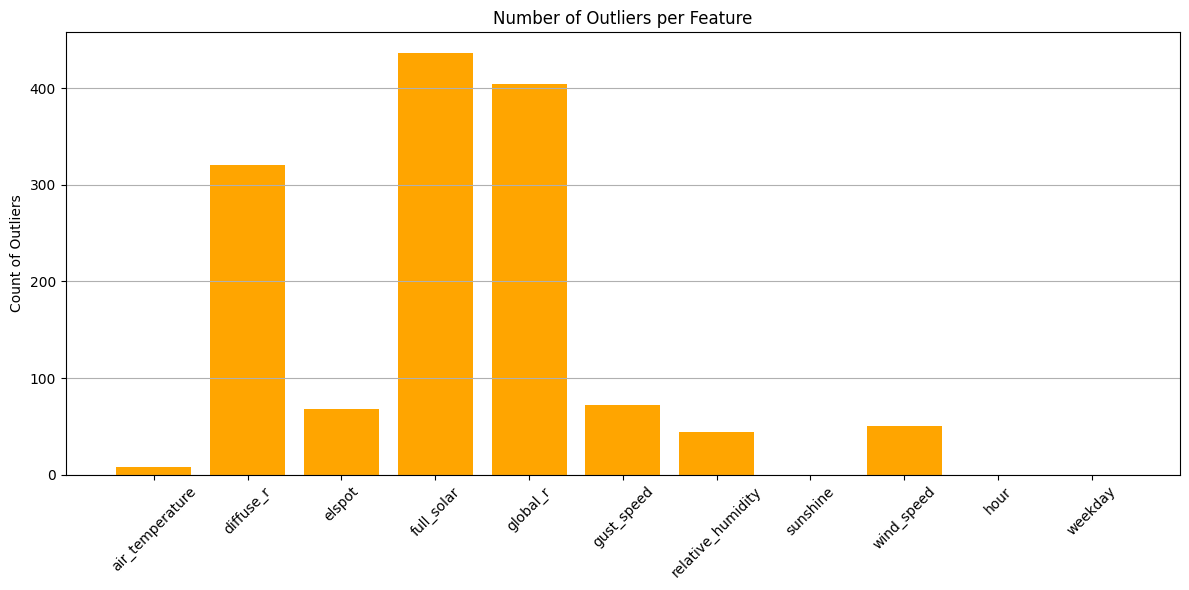

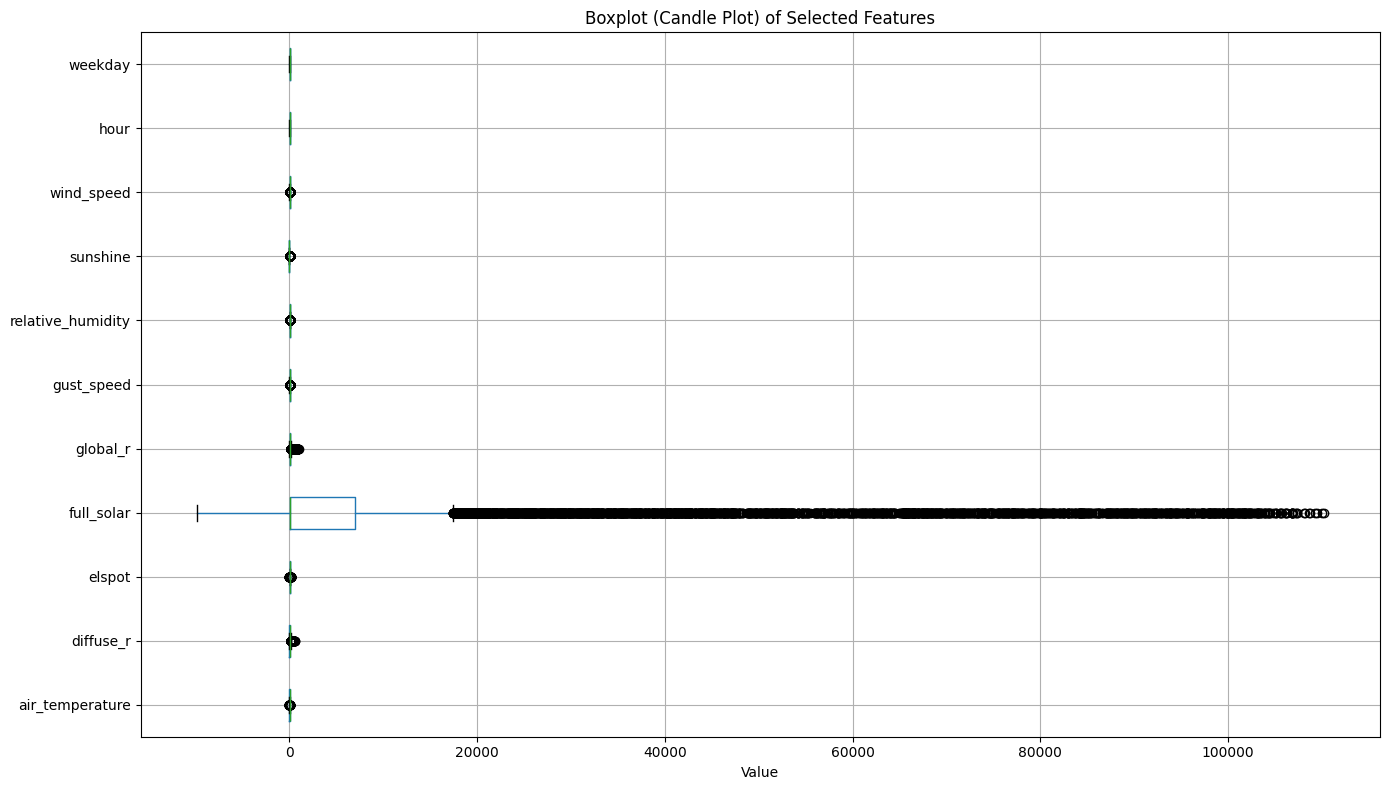

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load training data
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")

# Add 'hour' and 'weekday' columns
df_Train['datetime'] = pd.to_datetime(df_Train['datetime'])
df_Train['hour'] = df_Train['datetime'].dt.hour
df_Train['weekday'] = df_Train['datetime'].dt.weekday

# Selected features for analysis
selected_features = [
    'air_temperature',
    'diffuse_r',
    'elspot',
    'full_solar',
    'global_r',
    'gust_speed',
    'relative_humidity',
    'sunshine',
    'wind_speed',
    'hour',
    'weekday',
]

# Dictionary to store outlier counts
outlier_counts = {}

# Outlier detection and summary statistics
print("=== Outlier & Range Analysis ===")
for feature in selected_features:
    data = df_Train[feature].dropna()
    z_scores = zscore(data)
    outliers = data[np.abs(z_scores) > 3]
    outlier_counts[feature] = len(outliers)

    print(f"\n📌 Feature: {feature}")
    print(f"  ➤ Min value     : {data.min():.3f}")
    print(f"  ➤ Max value     : {data.max():.3f}")
    print(f"  ➤ Mean ± Std    : {data.mean():.2f} ± {data.std():.2f}")
    print(f"  ⚠ Outliers found: {len(outliers)}")
    if len(outliers) > 0:
        print(f"    Outlier values (first 5): {outliers.head().values}")

# -----------------------------
# Bar Plot of Outlier Counts
# -----------------------------
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='orange')
plt.title("Number of Outliers per Feature")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# -----------------------------
# Boxplot (Candle Plot)
# -----------------------------
plt.figure(figsize=(14, 8))
df_Train[selected_features].boxplot(vert=False)
plt.title("Boxplot (Candle Plot) of Selected Features")
plt.xlabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


standardization

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the datasets
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")
df_Test = pd.read_excel("0_weather_data_testing_0.xlsx")
df_Val = pd.read_excel("1_weather_data_validation_1.xlsx")

# Add hour and weekday to all DataFrames
for df in [df_Train, df_Test, df_Val]:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday

# Define selected features
selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar',
    'global_r', 'gust_speed', 'relative_humidity', 'sunshine',
    'wind_speed', 'hour', 'weekday'
]

# Extract selected features
X_train = df_Train[selected_features].copy()
X_test = df_Test[selected_features].copy()
X_val = df_Val[selected_features].copy()

# Standardize features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=selected_features, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=selected_features, index=X_test.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=selected_features, index=X_val.index)


=== Outlier & Range Analysis (Standardized) ===

📌 Feature: air_temperature
  ➤ Min value     : -3.365
  ➤ Max value     : 3.010
  ➤ Mean ± Std    : -0.00 ± 1.00
  ⚠ Outliers found: 8
    Outlier values (first 5): [-3.17033215 -3.06713594 -3.36525832 -3.33085958 -3.36525832]

📌 Feature: diffuse_r
  ➤ Min value     : -0.541
  ➤ Max value     : 7.959
  ➤ Mean ± Std    : -0.00 ± 1.00
  ⚠ Outliers found: 320
    Outlier values (first 5): [3.13942081 3.31836246 3.2274249  4.23360499 4.18226928]

📌 Feature: elspot
  ➤ Min value     : -2.573
  ➤ Max value     : 9.645
  ➤ Mean ± Std    : -0.00 ± 1.00
  ⚠ Outliers found: 68
    Outlier values (first 5): [3.19901336 3.72576628 5.26757146 4.14936596 3.02810859]

📌 Feature: full_solar
  ➤ Min value     : -0.893
  ➤ Max value     : 4.426
  ➤ Mean ± Std    : -0.00 ± 1.00
  ⚠ Outliers found: 436
    Outlier values (first 5): [3.12566683 3.40353622 3.40436734 3.22049132 3.66444546]

📌 Feature: global_r
  ➤ Min value     : -0.507
  ➤ Max value     : 5.

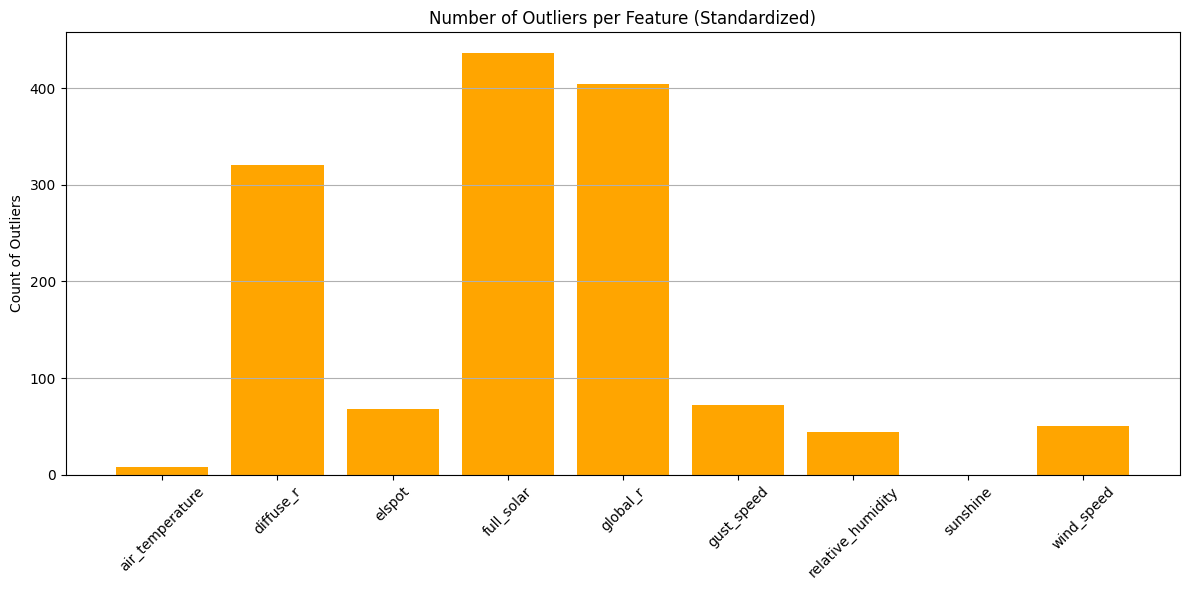

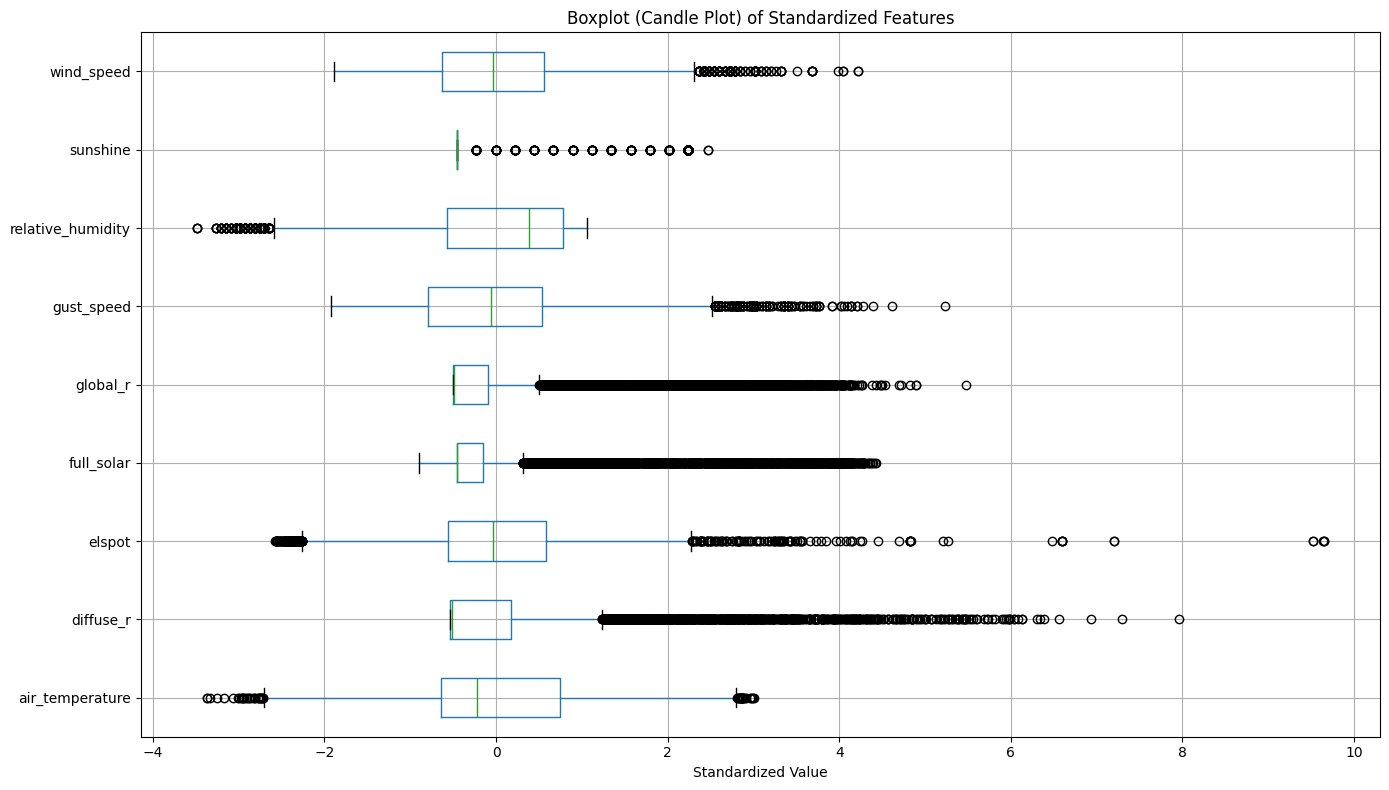

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Load data
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")
df_Test = pd.read_excel("0_weather_data_testing_0.xlsx")
df_Val = pd.read_excel("1_weather_data_validation_1.xlsx")

# Add 'hour' and 'weekday' if needed (used only in preprocessing, not analysis)
for df in [df_Train, df_Test, df_Val]:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday

# Selected features (excluding datetime, hour, weekday)
selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar',
    'global_r', 'gust_speed', 'relative_humidity', 'sunshine',
    'wind_speed'
]

# Standardize selected features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_Train[selected_features]),
                              columns=selected_features, index=df_Train.index)

# Outlier detection and statistics
outlier_counts = {}

print("=== Outlier & Range Analysis (Standardized) ===")
for feature in selected_features:
    data = X_train_scaled[feature]
    z_scores = zscore(data)
    outliers = data[np.abs(z_scores) > 3]
    outlier_counts[feature] = len(outliers)

    print(f"\n📌 Feature: {feature}")
    print(f"  ➤ Min value     : {data.min():.3f}")
    print(f"  ➤ Max value     : {data.max():.3f}")
    print(f"  ➤ Mean ± Std    : {data.mean():.2f} ± {data.std():.2f}")
    print(f"  ⚠ Outliers found: {len(outliers)}")
    if len(outliers) > 0:
        print(f"    Outlier values (first 5): {outliers.head().values}")

# Plot bar chart of outlier counts
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='orange')
plt.title("Number of Outliers per Feature (Standardized)")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Plot boxplots (candle plots)
plt.figure(figsize=(14, 8))
X_train_scaled.boxplot(vert=False)
plt.title("Boxplot (Candle Plot) of Standardized Features")
plt.xlabel("Standardized Value")
plt.grid(True)
plt.tight_layout()
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt



* A ) Load & Preprocess Data ✅
*    ↓
* B ) Feature Engineering    ✅
*    ↓
* C ) Feature Selection (Correlation + Granger) ✅
*    ↓
* D ) Train/Val/Test Split  ✅
*    ↓
* E ) Standardization (after split!)
*    ↓
* F ) Model Training (with uncertainty method)
*    ↓
* G ) Prediction + Uncertainty Estimation
*   ↓
* H ) Evaluation (accuracy + uncertainty)
*    ↓
* I ) Visualization & Export


## * D and E ) Standardization (after split!)    ✅

In [12]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # ✅ import for handling date axes
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load Excel files
df_Train = pd.read_excel("2_weather_data_training_2.xlsx")
df_Test = pd.read_excel("0_weather_data_testing_0.xlsx")
df_Val = pd.read_excel("1_weather_data_validation_1.xlsx")
# Selected features (excluding datetime for scaling)
features_to_scale = [
    'air_temperature',       # importance ≈ 3.5%   (✅ required)
    'diffuse_r',             # importance ≈ 21.4%  (✅ required)
    'elspot',                # importance ≈ 26.9%  (✅ required)
    'full_solar',            # importance ≈ 13.3%  (✅ required)
    'global_r',              # importance ≈ 16.4%  (✅ required)
    'gust_speed',            # importance ≈ 9.9%   (⚠️ optional)
    'relative_humidity',     # importance ≈ 5.6%   (⚠️ optional)
    'sunshine',              # importance ≈ 11.4%  (⚠️ optional)
    'wind_speed',            # importance ≈ 8.4%   (⚠️ optional)
    ]
# Extract 'datetime' columns
datetime_train = df_Train['datetime']
datetime_test = df_Test['datetime']
datetime_val = df_Val['datetime']
# Initialize and fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_Train[features_to_scale]),
                              columns=features_to_scale, index=df_Train.index)
X_test_scaled = pd.DataFrame(scaler.transform(df_Test[features_to_scale]),
                             columns=features_to_scale, index=df_Test.index)
X_val_scaled = pd.DataFrame(scaler.transform(df_Val[features_to_scale]),
                            columns=features_to_scale, index=df_Val.index)
# Reattach 'datetime' column at the front
X_train_scaled.insert(0, 'datetime', datetime_train)
X_test_scaled.insert(0, 'datetime', datetime_test)
X_val_scaled.insert(0, 'datetime', datetime_val)


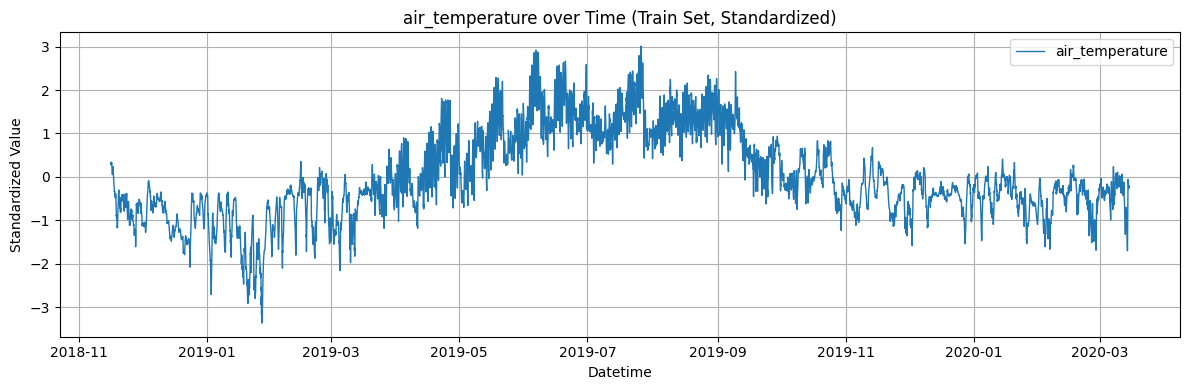

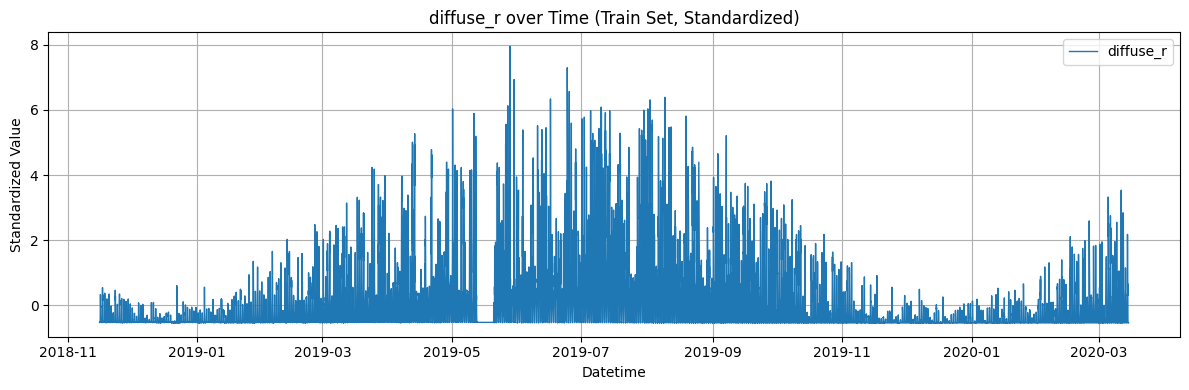

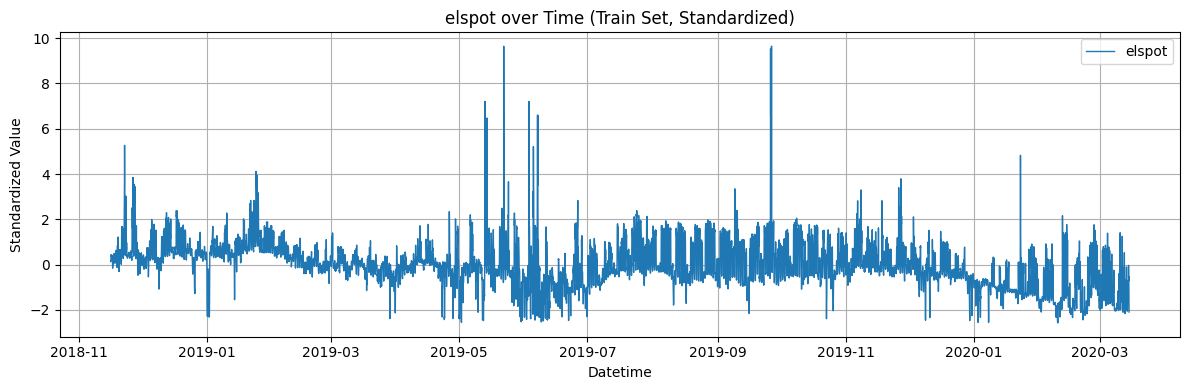

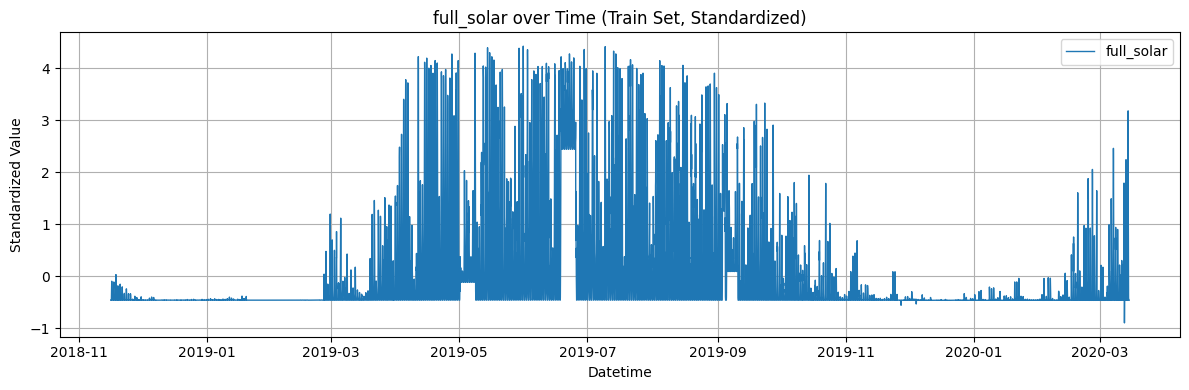

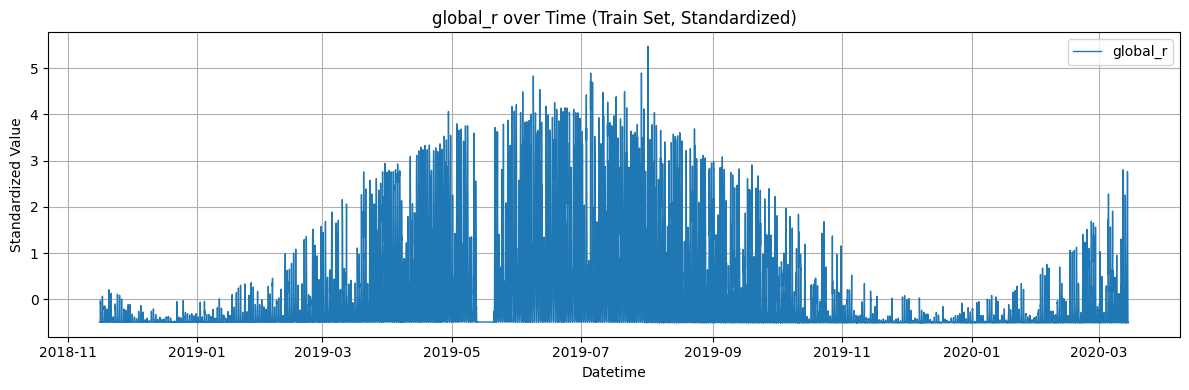

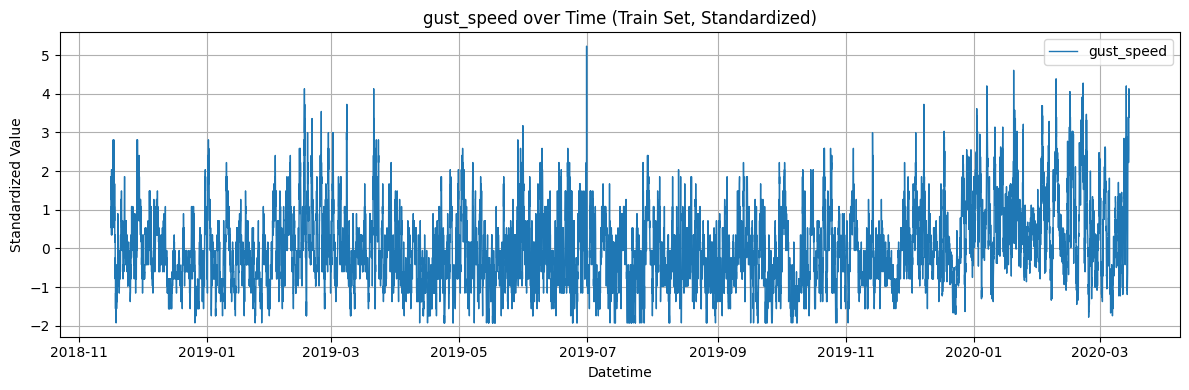

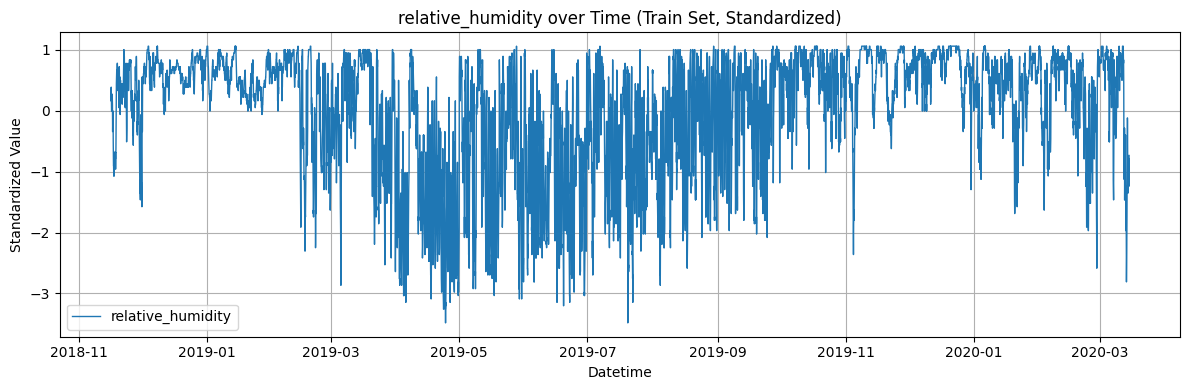

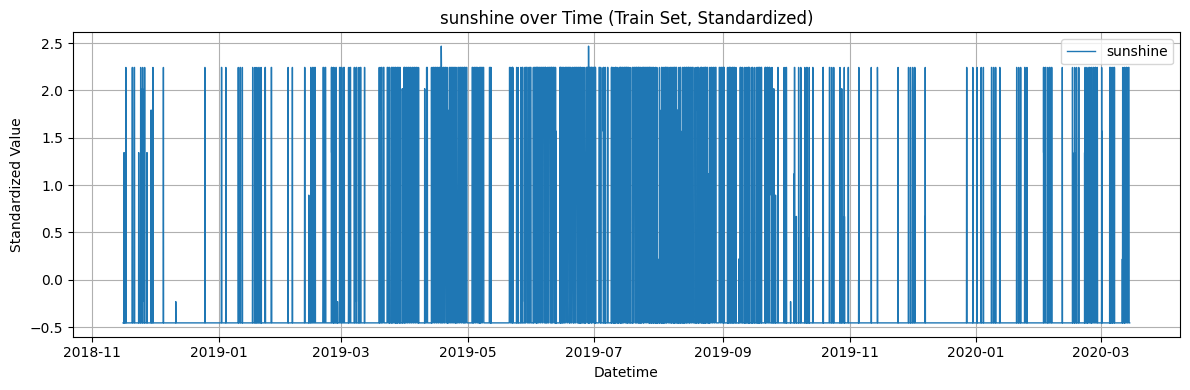

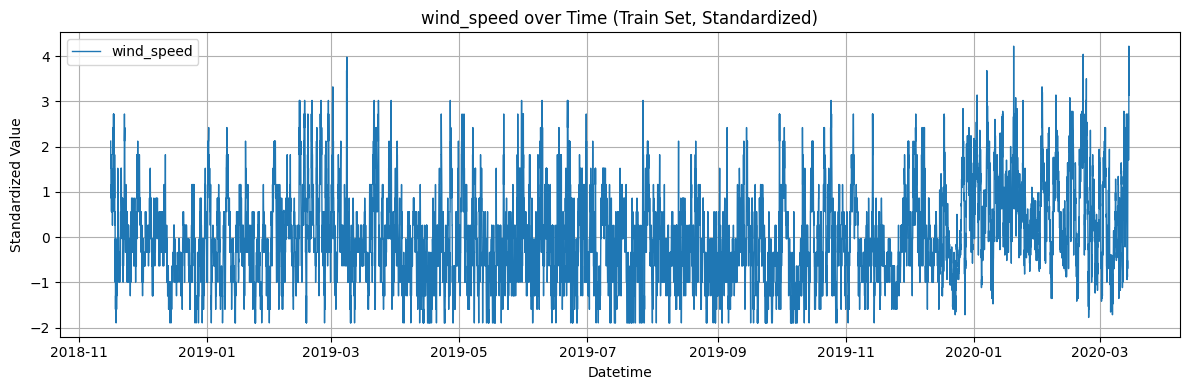

             datetime  energy  air_temperature  diffuse_r    elspot  \
0 2018-11-16 00:00:00   161.6         0.326873  -0.528883  0.149584   
1 2018-11-16 01:00:00   160.6         0.315406  -0.530350  0.127610   
2 2018-11-16 02:00:00   160.2         0.303940  -0.525950  0.136156   
3 2018-11-16 03:00:00   159.0         0.303940  -0.524483  0.164843   
4 2018-11-16 04:00:00   158.0         0.303940  -0.525950  0.274100   
5 2018-11-16 05:00:00   155.8         0.303940  -0.520083  0.333307   
6 2018-11-16 06:00:00   158.0         0.269541  -0.525950  0.415097   
7 2018-11-16 07:00:00   156.4         0.303940  -0.436479  0.440732   
8 2018-11-16 08:00:00   156.0         0.292474   0.205951  0.391902   
9 2018-11-16 09:00:00   150.2         0.326873   0.311556  0.357722   

   full_solar  global_r  gust_speed  relative_humidity  sunshine  wind_speed  
0   -0.456244 -0.491608    1.855847           0.218629 -0.455473    2.123126  
1   -0.456235 -0.491033    1.488741           0.162524 -0.45

In [13]:
import matplotlib.pyplot as plt

# List of features to plot
features_to_scale = [
    'air_temperature',
    'diffuse_r',
    'elspot',
    'full_solar',
    'global_r',
    'gust_speed',
    'relative_humidity',
    'sunshine',
    'wind_speed',
]

# Function to plot feature over time for a given dataset
def plot_features_over_time(df_scaled, dataset_name):
    for feature in features_to_scale:
        plt.figure(figsize=(12, 4))
        plt.plot(df_scaled['datetime'], df_scaled[feature], label=feature, linewidth=1)
        plt.title(f"{feature} over Time ({dataset_name}, Standardized)")
        plt.xlabel("Datetime")
        plt.ylabel("Standardized Value")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Plot for Train, Test, and Validation datasets
plot_features_over_time(X_train_scaled, "Train Set")
#plot_features_over_time(X_test_scaled, "Test Set")
#plot_features_over_time(X_val_scaled, "Validation Set")
# Show the first 10 rows of the standardized training data
# Add the 'energy' column from the original training data (not standardized)
X_train_scaled.insert(1, 'energy', df_Train['energy'].values)  # Insert after 'datetime'
# If you also want to do this for test and val:
X_test_scaled.insert(1, 'energy', df_Test['energy'].values)
X_val_scaled.insert(1, 'energy', df_Val['energy'].values)
print(X_train_scaled.head(10))


In [14]:
# Save the final standardized DataFrames with datetime and energy columns
X_train_scaled.to_excel("X_train_scaled.xlsx", index=False)
X_test_scaled.to_excel("X_test_scaled.xlsx", index=False)
X_val_scaled.to_excel("X_val_scaled.xlsx", index=False)

## *J) Innovation Droupout in the test data as well

# 21 June implementation

# RLSTM
we will try it with different params if professor allow because it giving good results.

Training RLSTM model 1/5
Epoch 1/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 64s 129ms/step - loss: 2.5745 - val_loss: 0.5863 - learning_rate: 1.0000e-04
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - loss: 0.5196 - val_loss: 0.5409 - learning_rate: 1.0000e-04
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - loss: 0.5042 - val_loss: 0.5429 - learning_rate: 1.0000e-04
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - loss: 0.4936 - val_loss: 0.5335 - learning_rate: 1.0000e-04
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - loss: 0.4871 - val_loss: 0.5367 - learning_rate: 1.0000e-04
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - loss: 0.4756 - val_loss: 0.5620 - learning_rate: 1.0000e-04
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - loss: 0.4698 - val_loss: 0.5221 - learning_rate: 1.0000e-04
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - loss: 0.4870 - val_loss: 0.5288 - learning_rate: 1.0000e-04
Epoch 9/100
351/351 ━━━━━━━━━━━

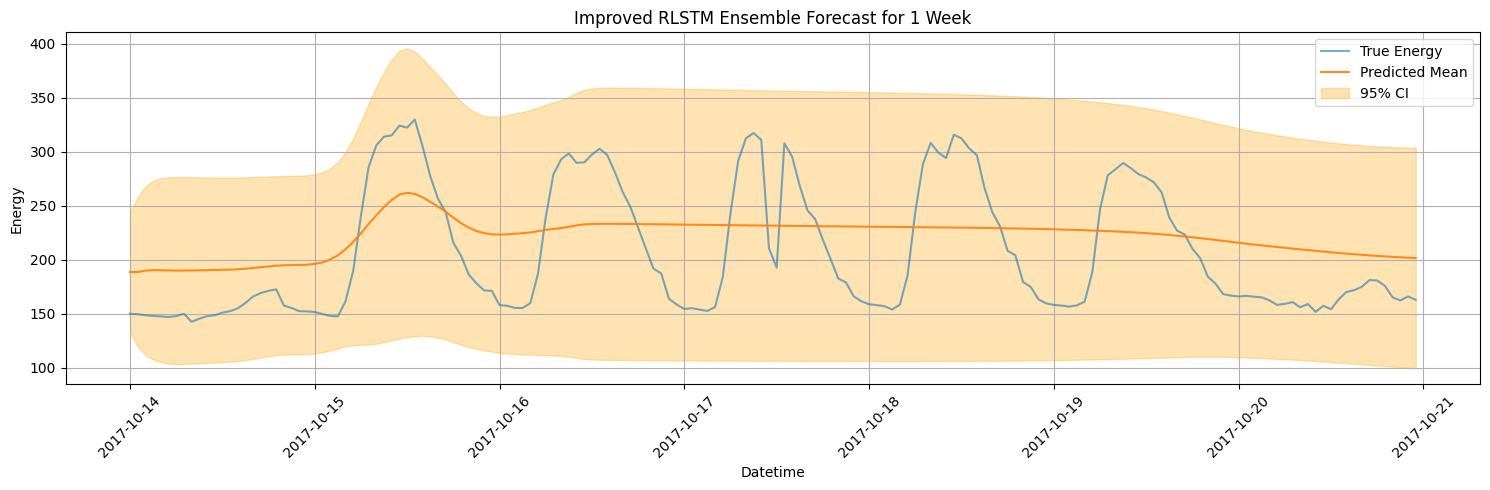

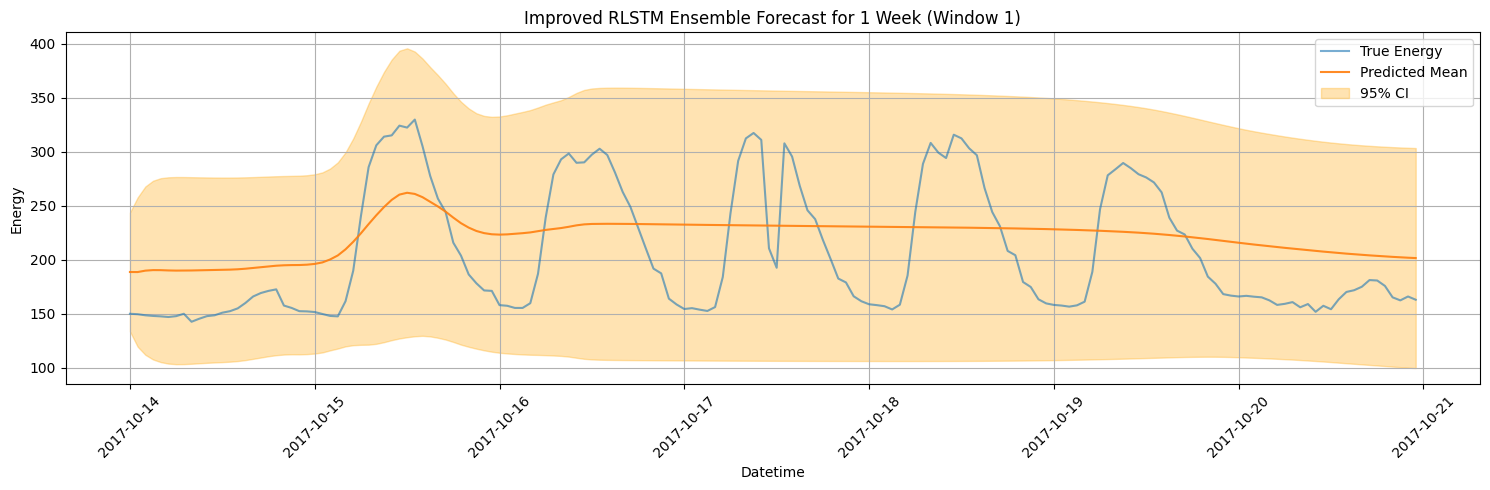

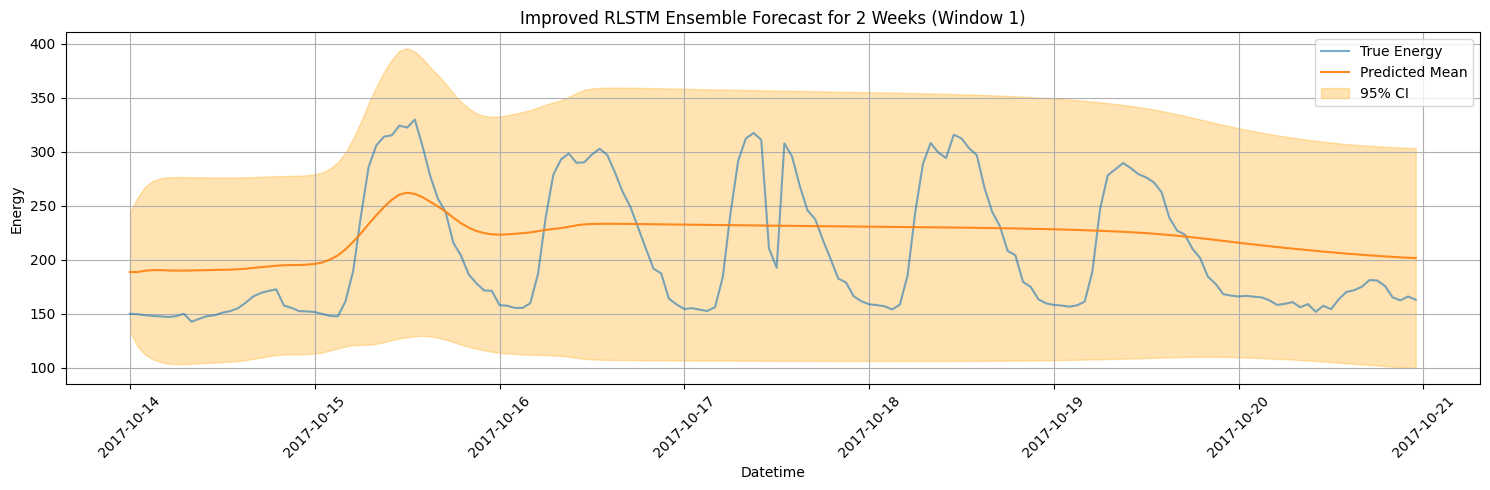

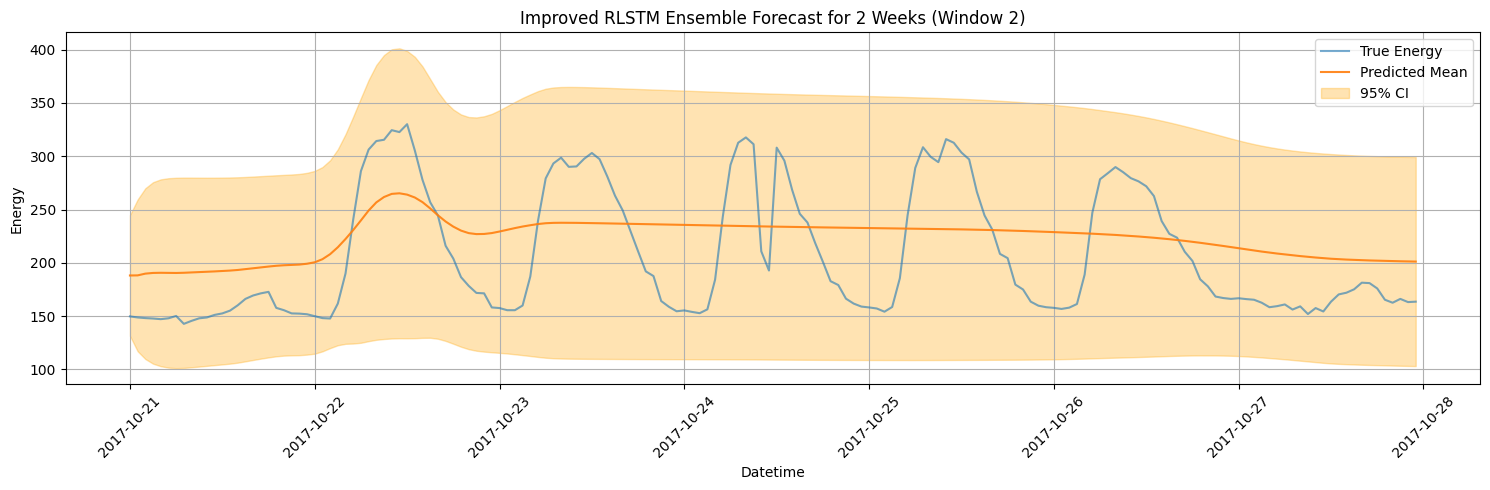

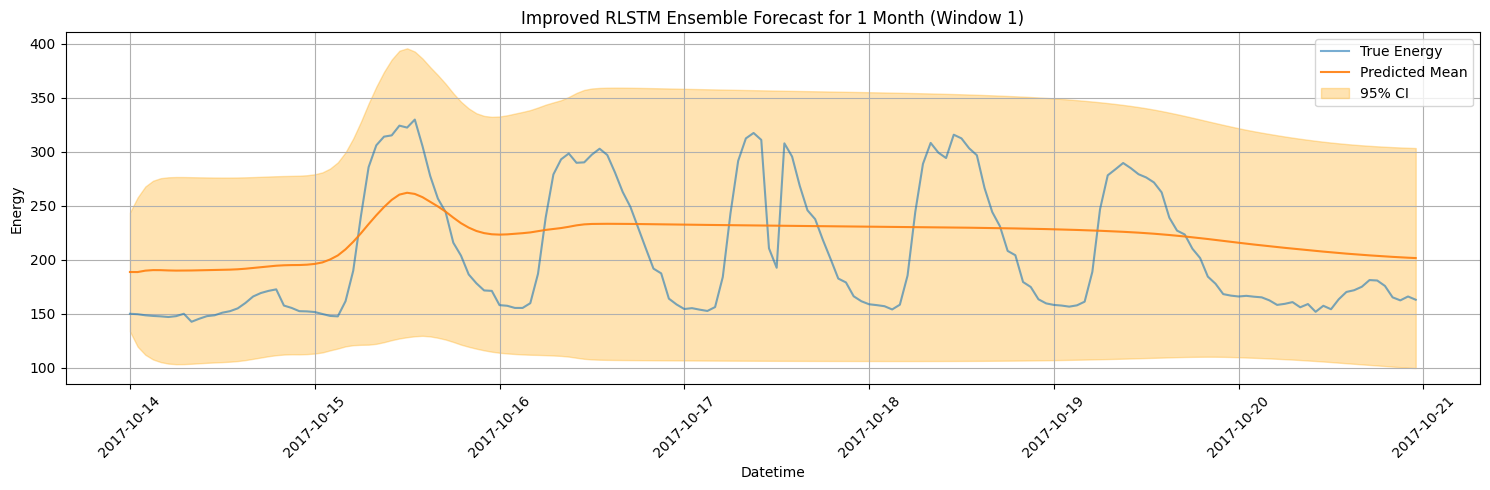

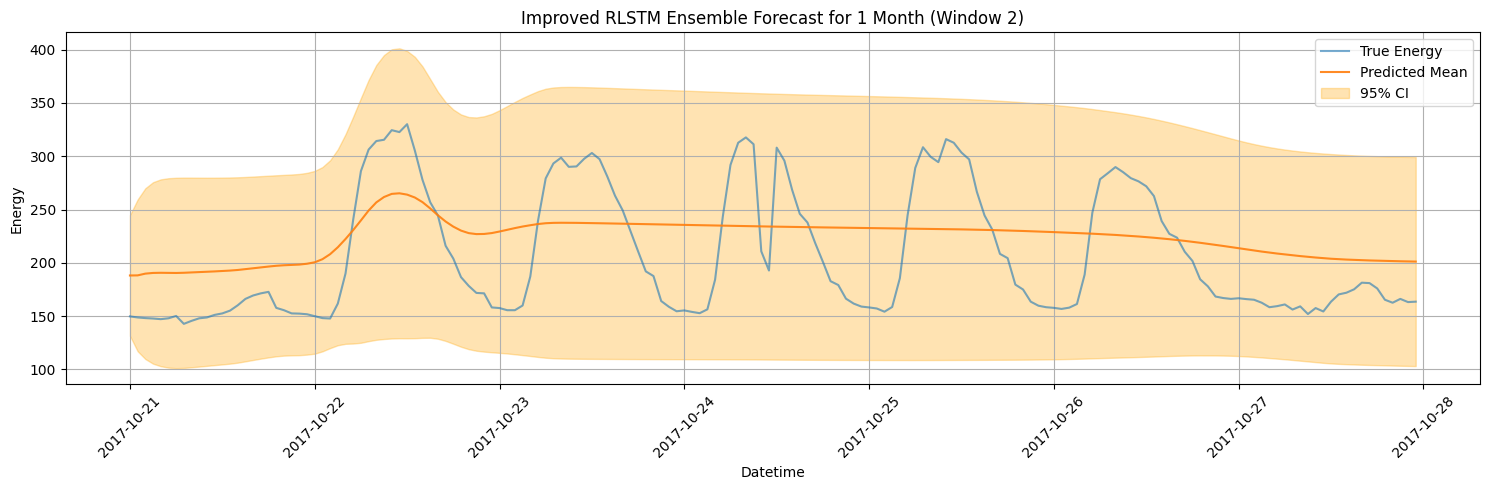

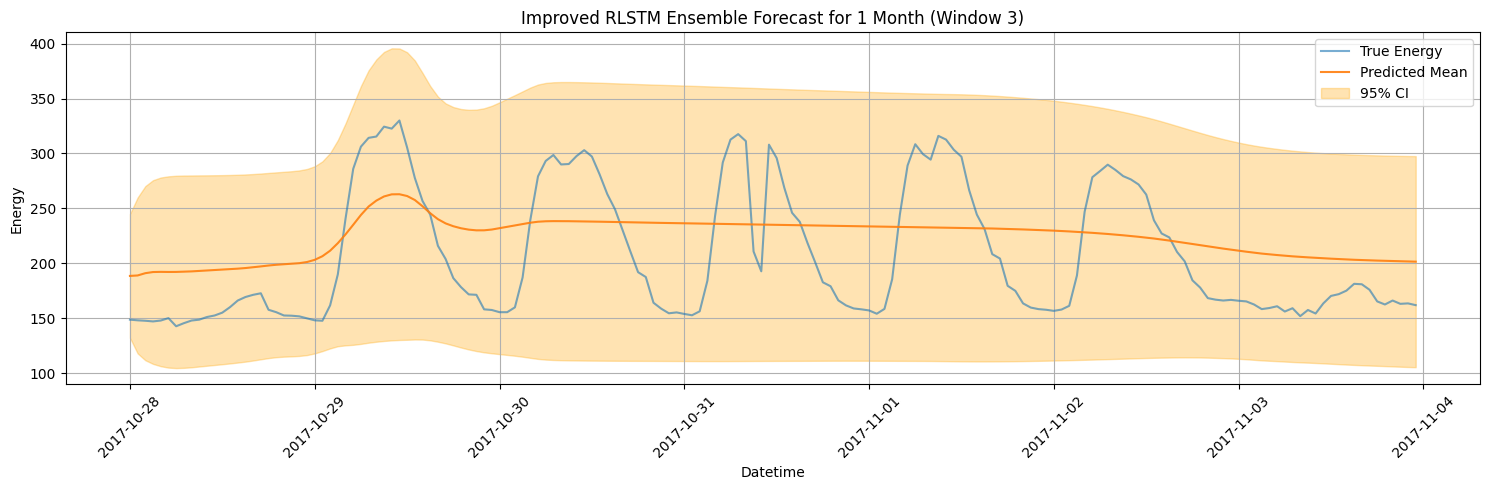

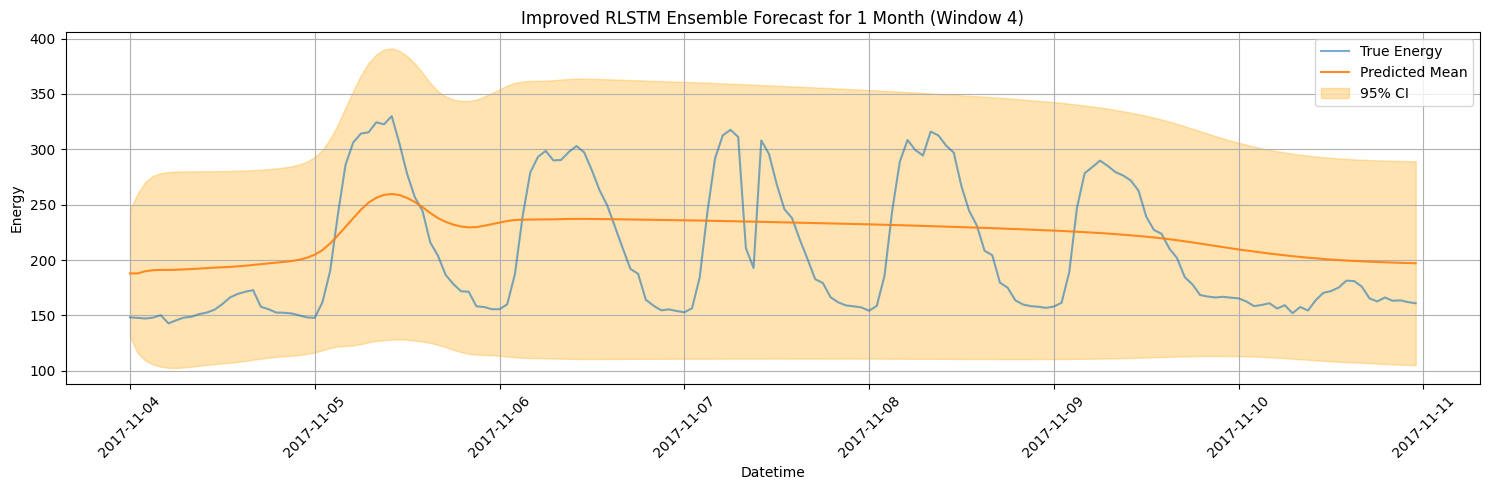

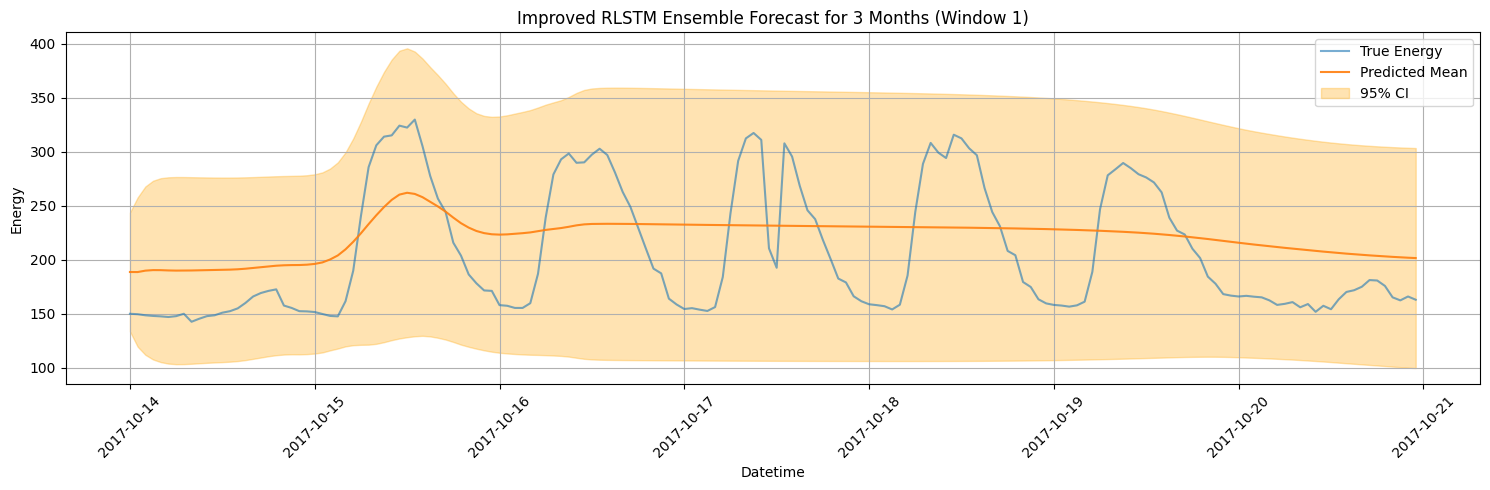

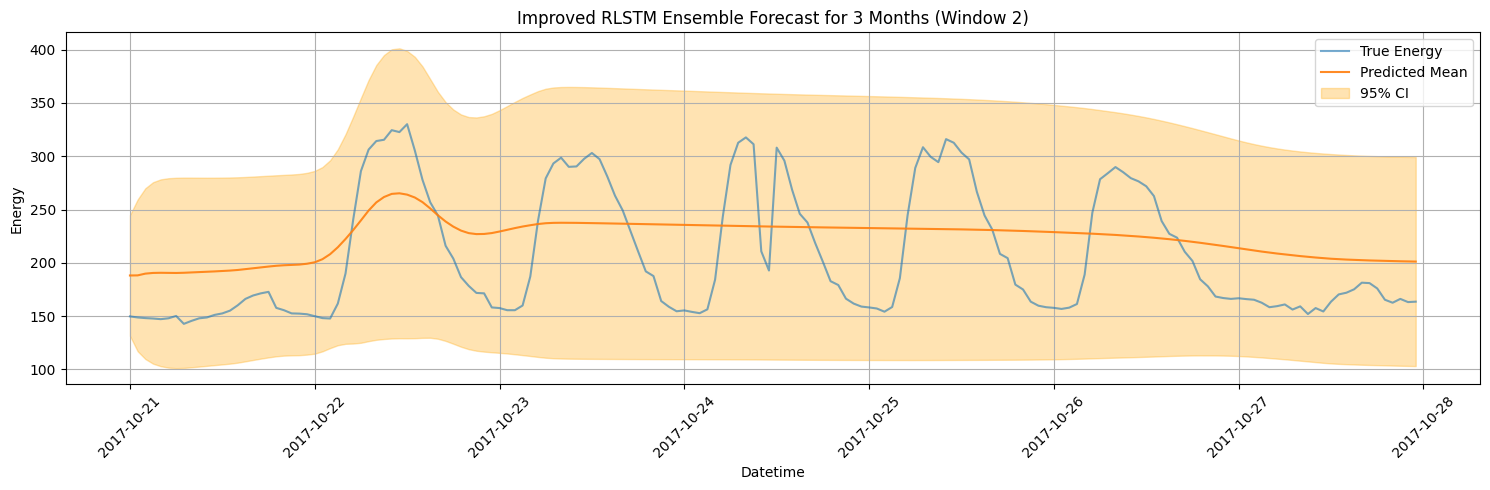

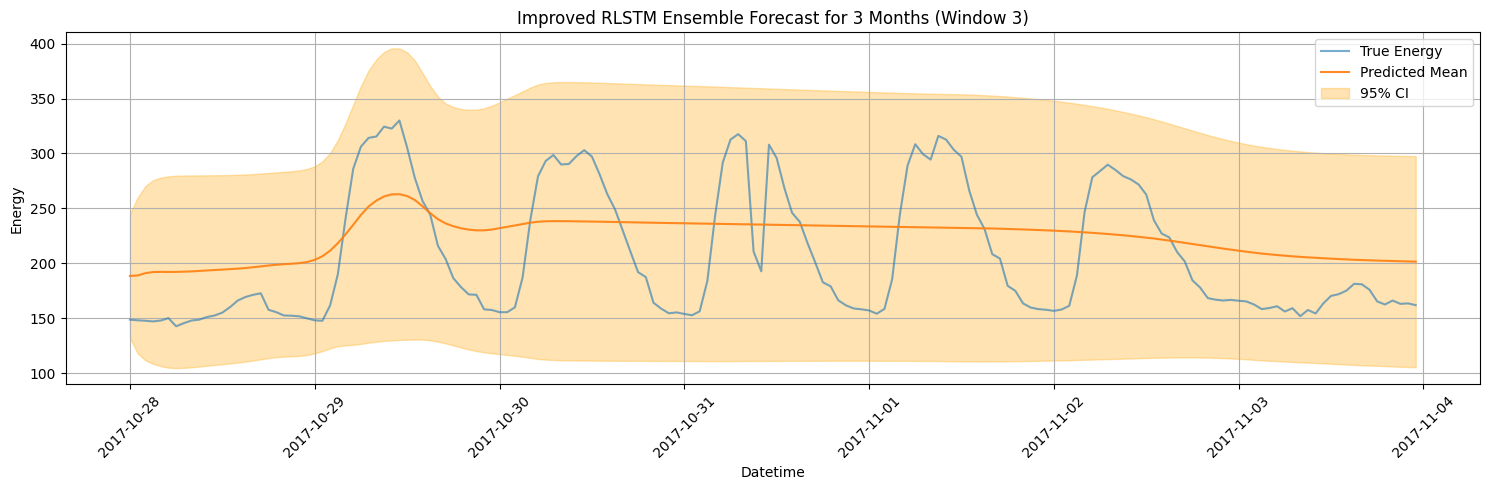

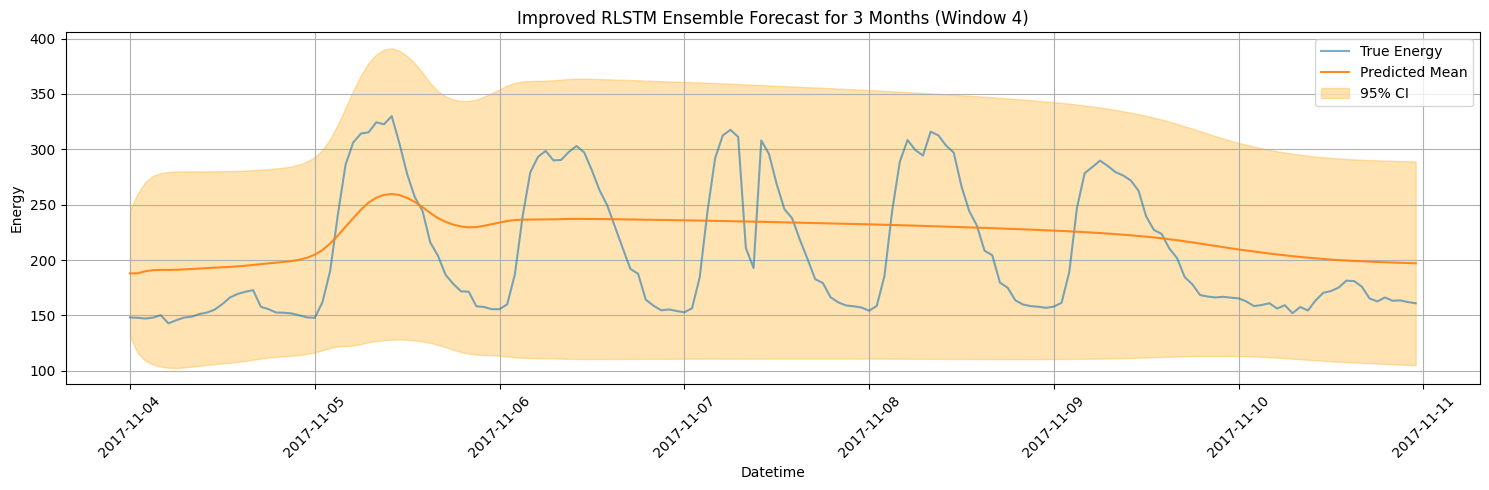

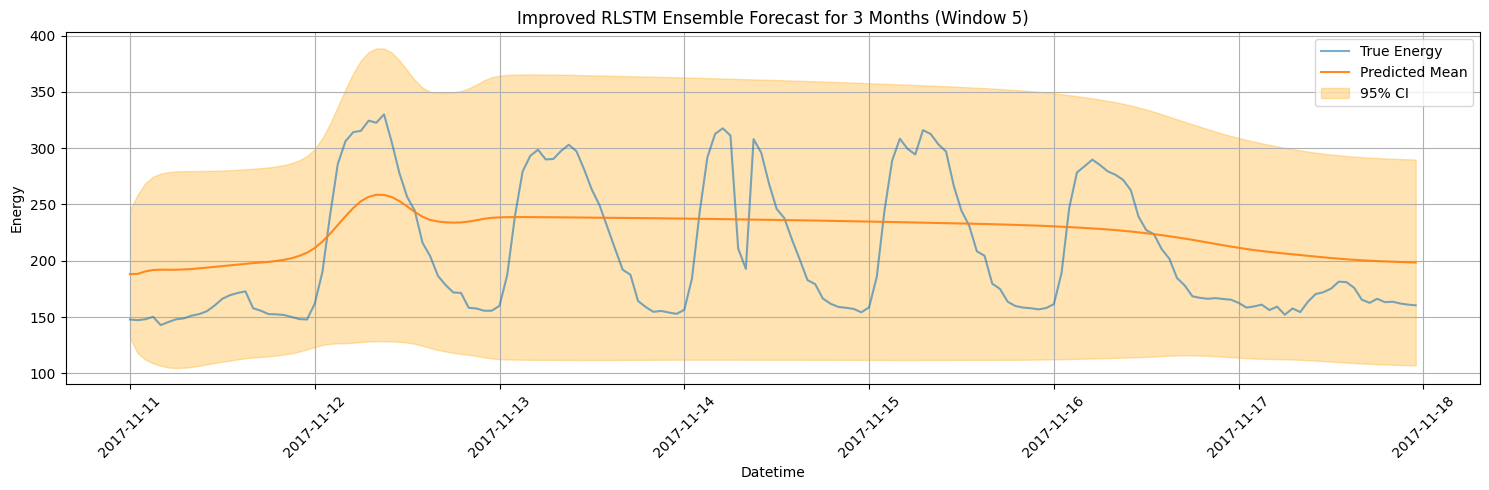

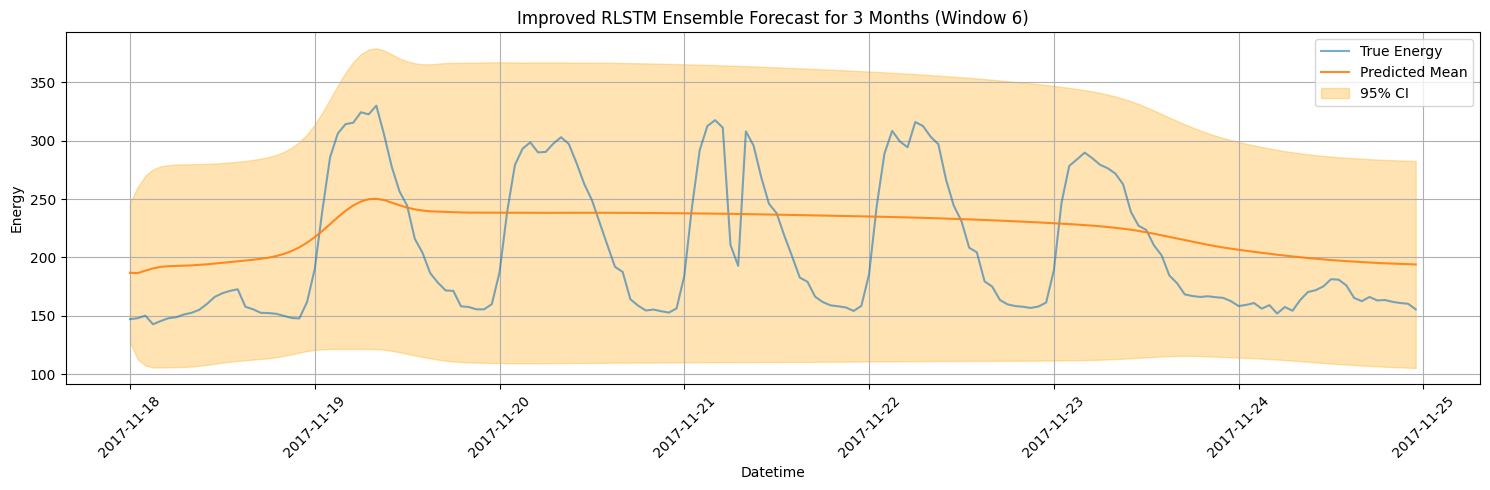

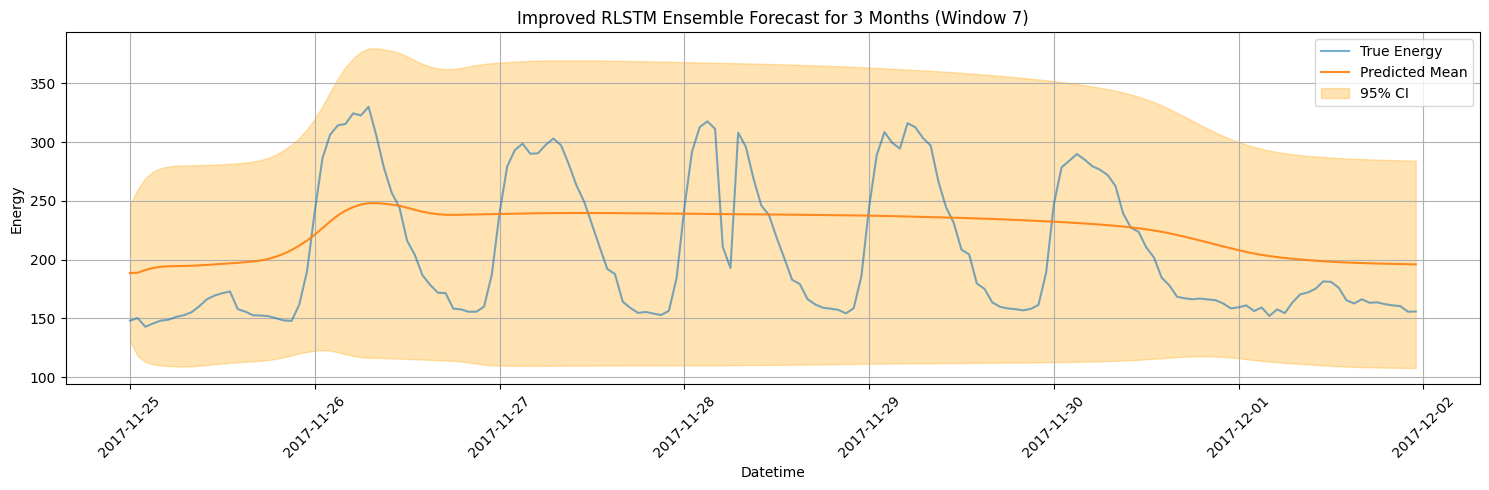

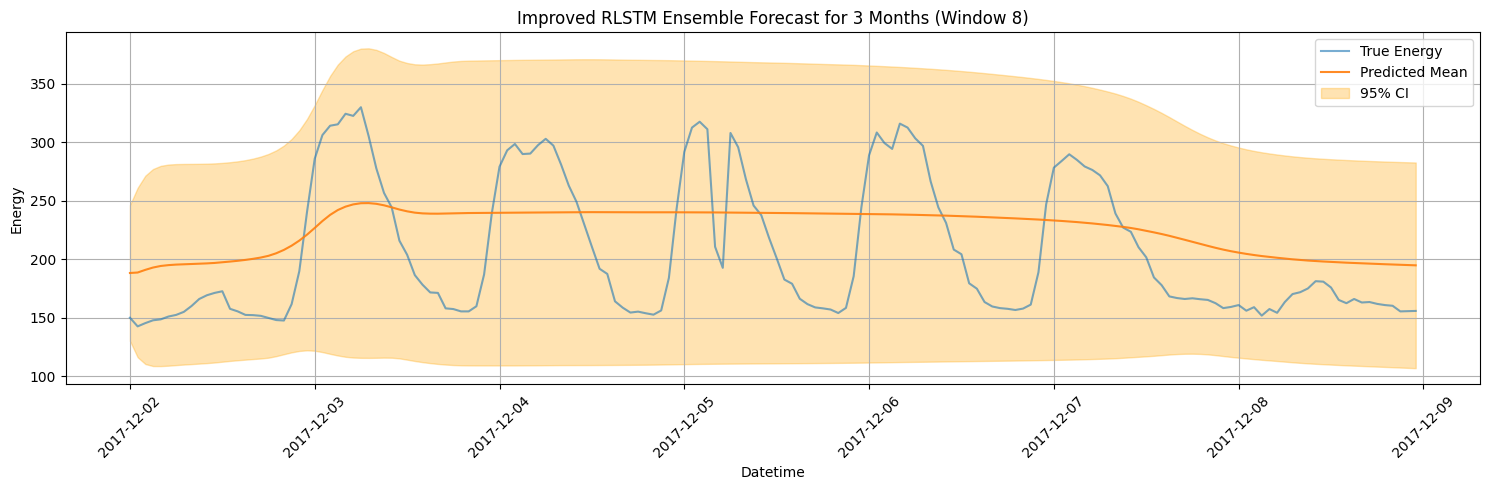

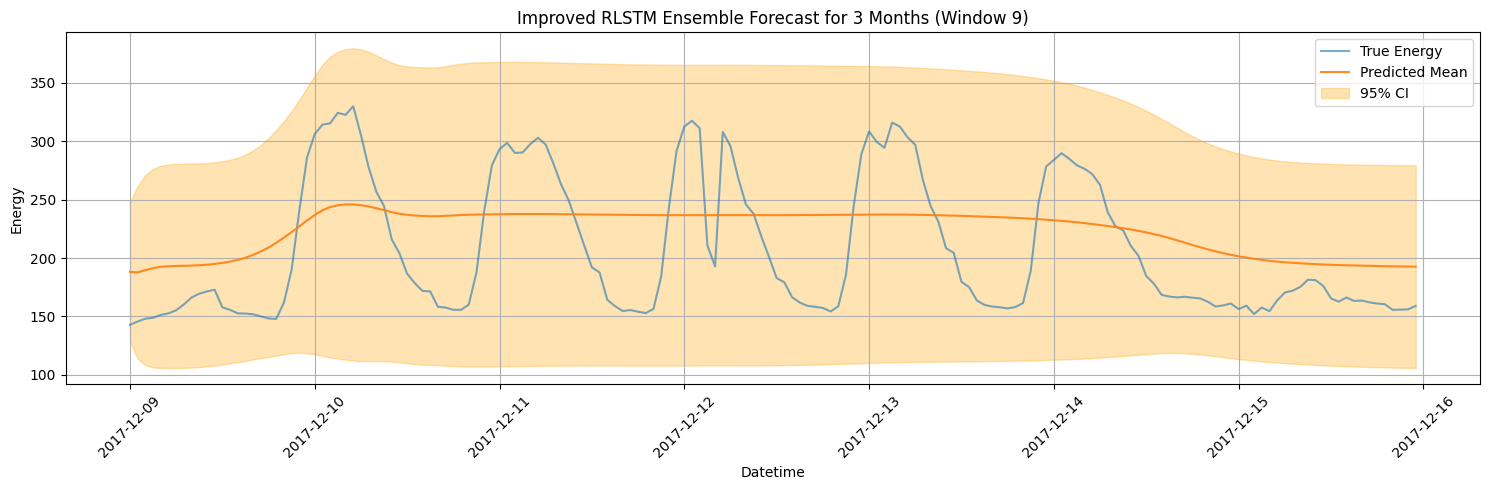

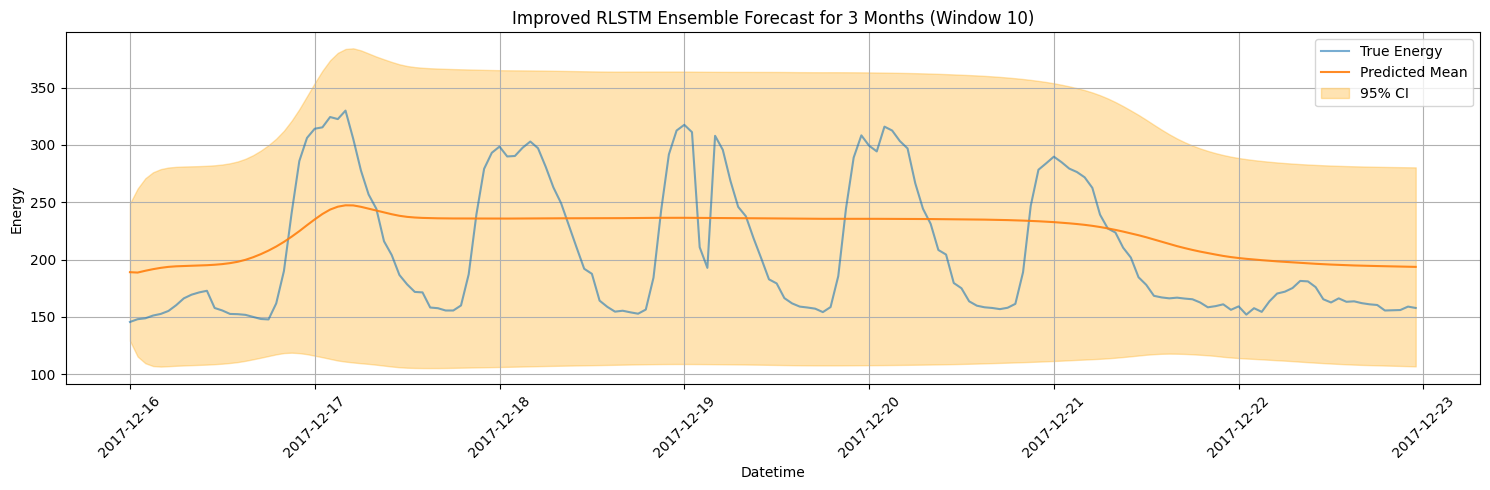

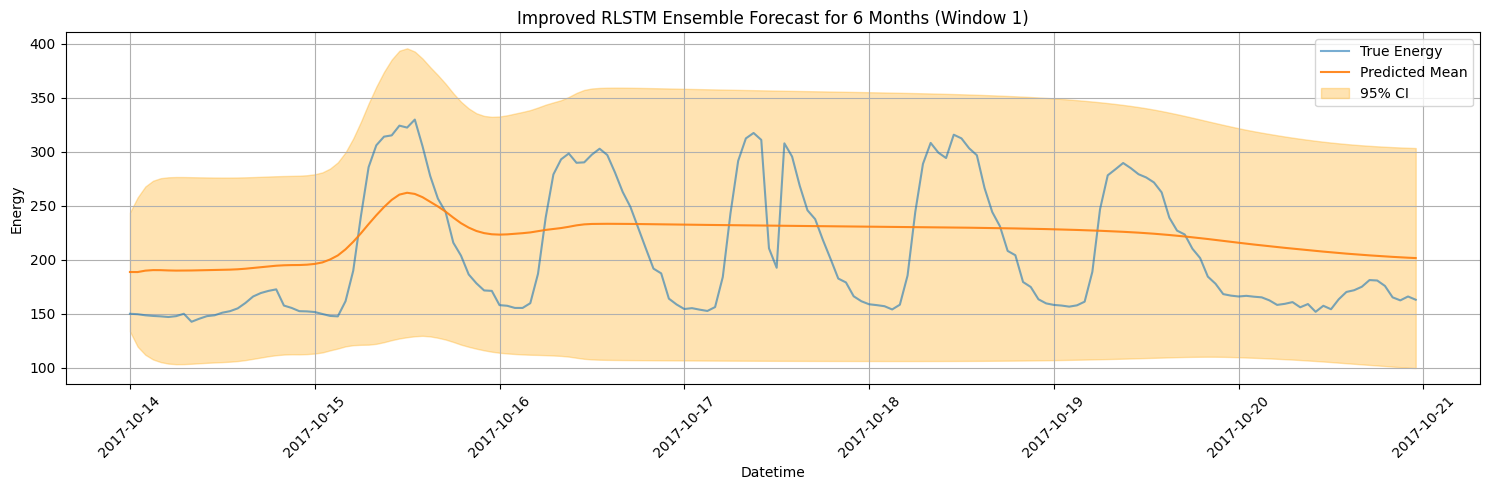

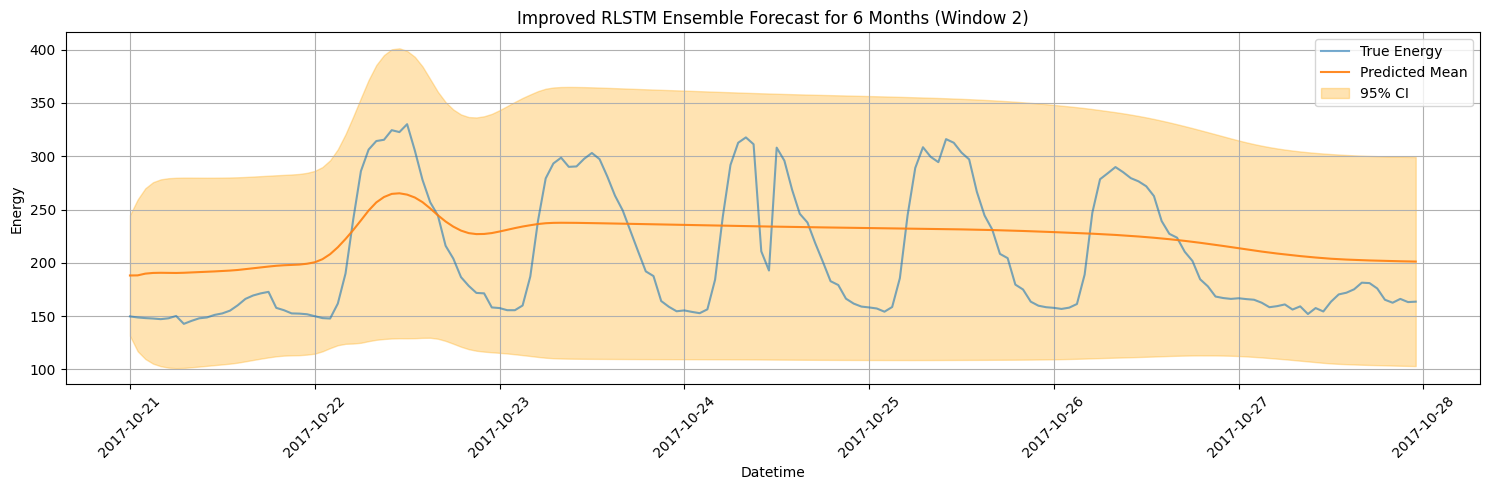

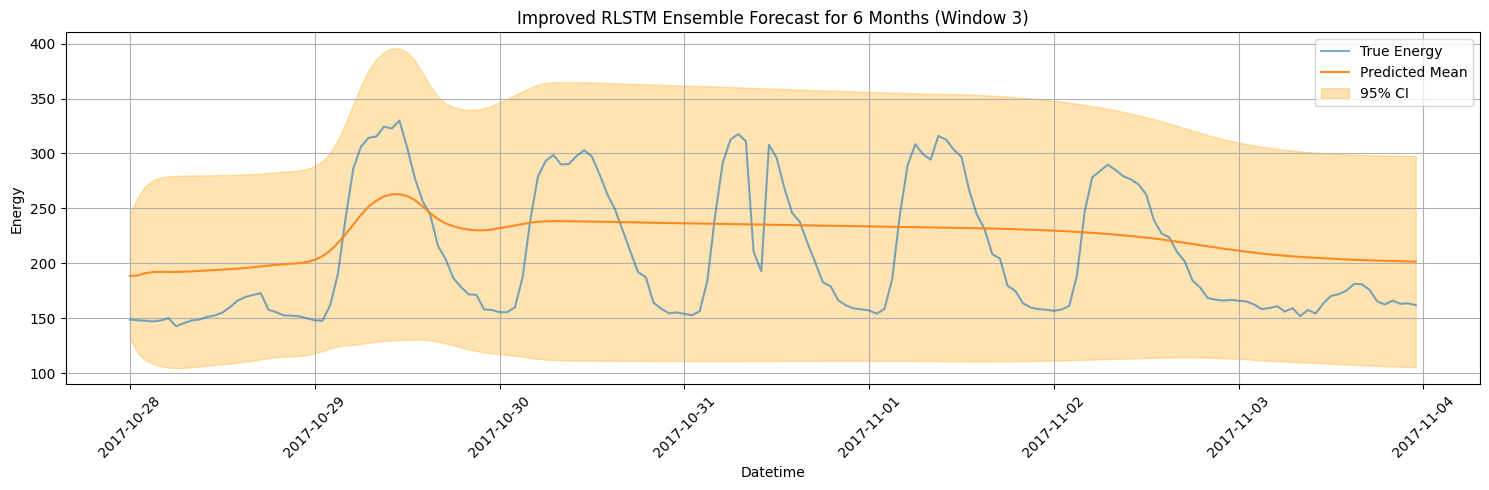

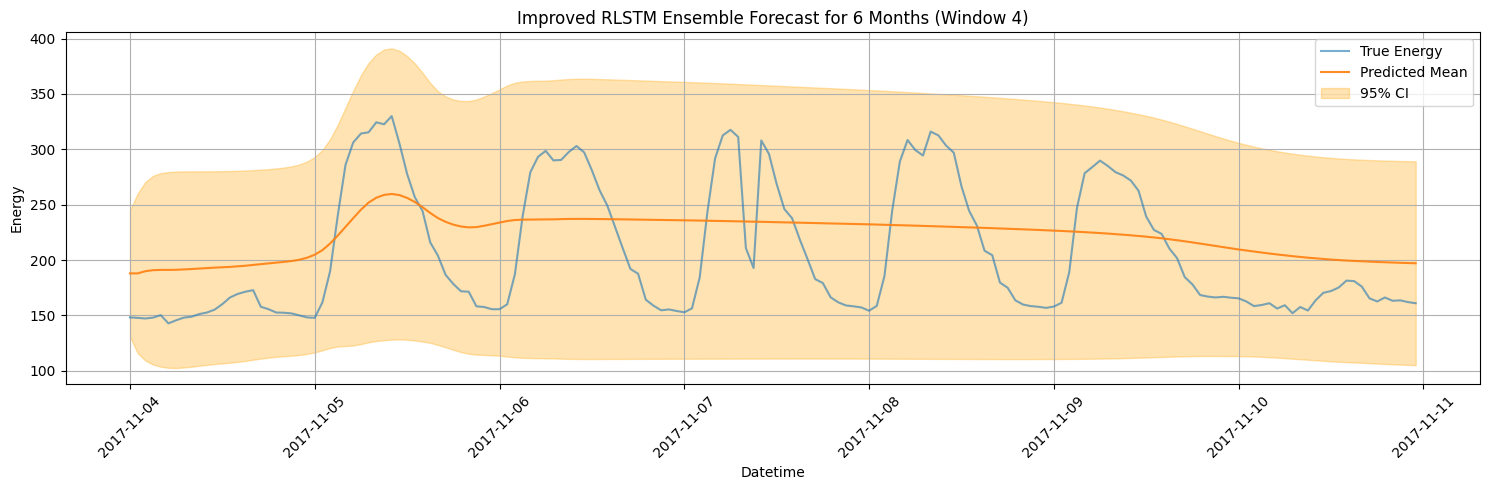

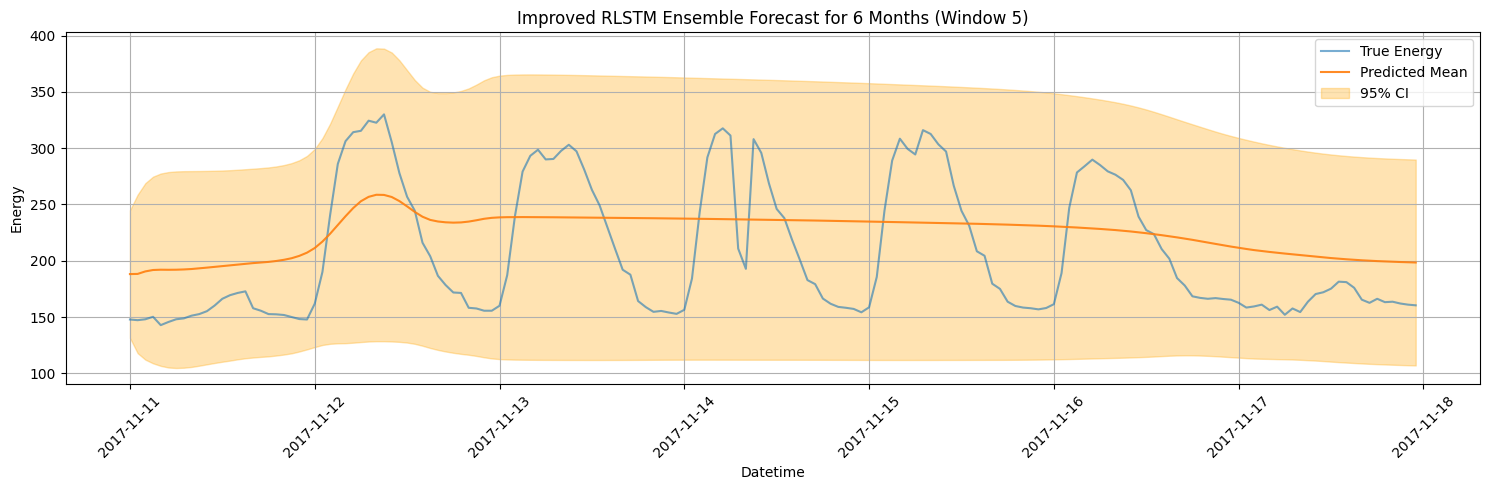

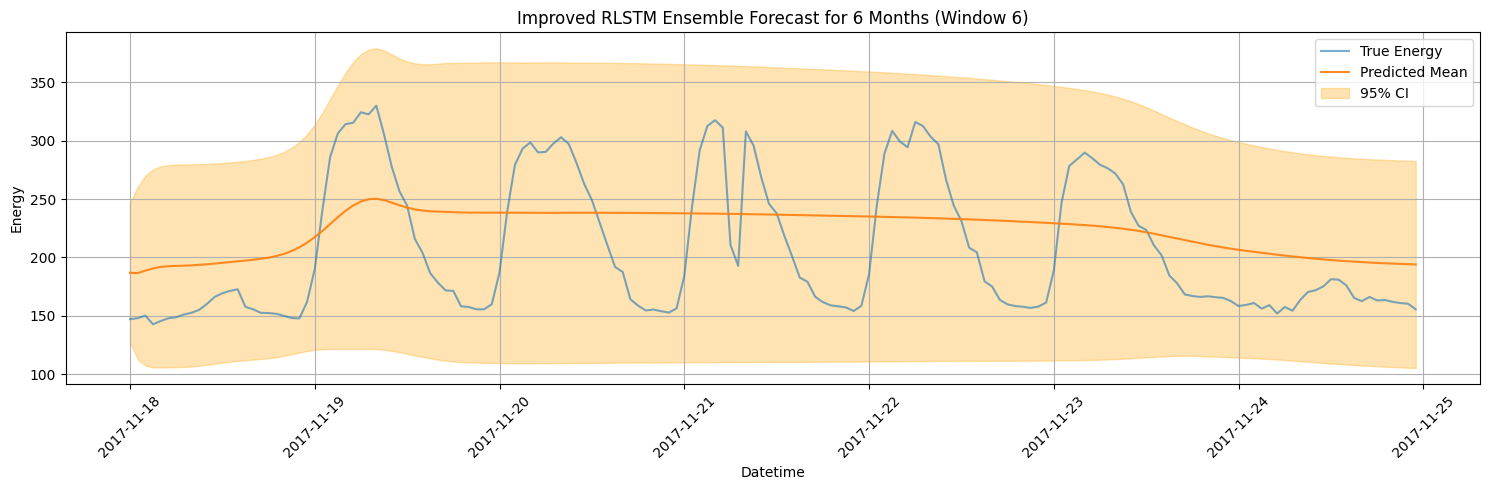

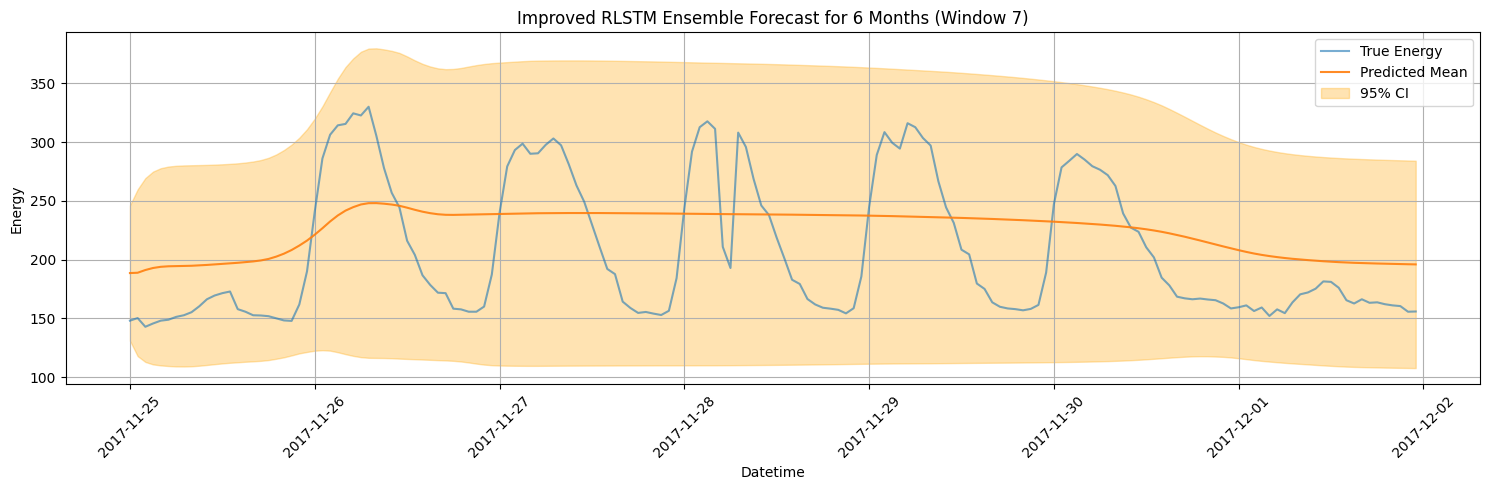

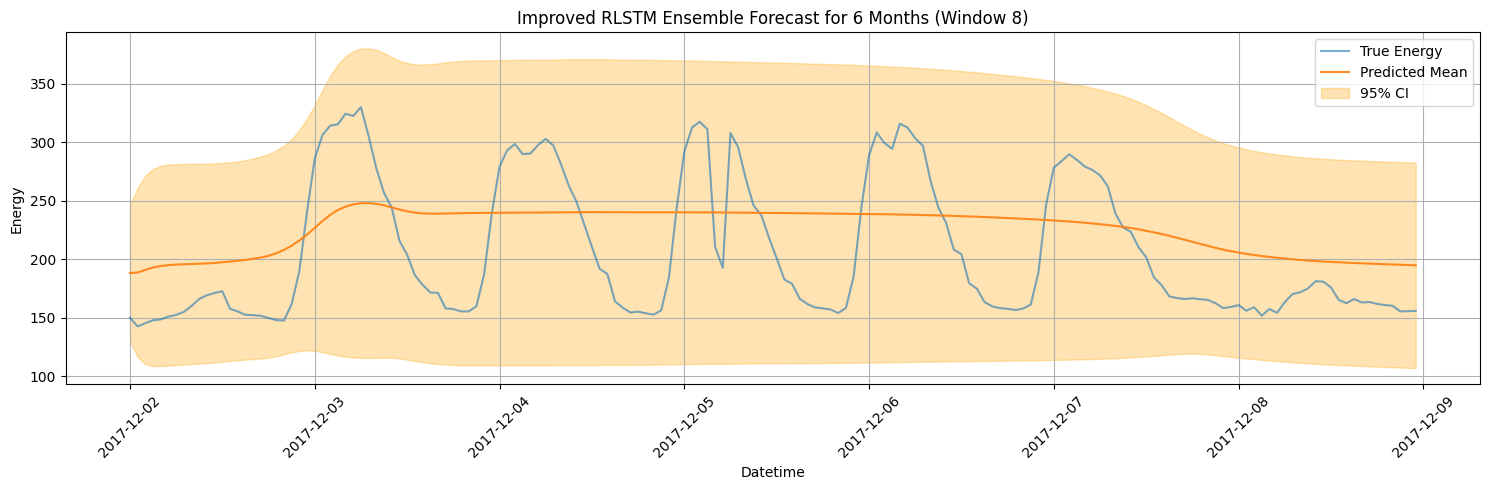

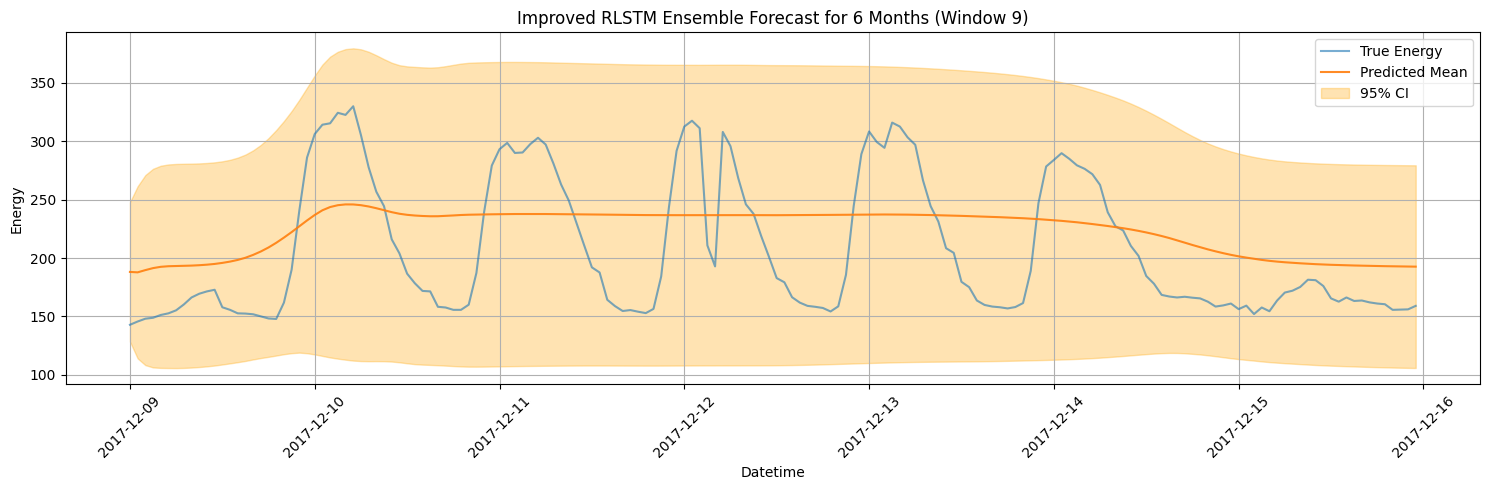

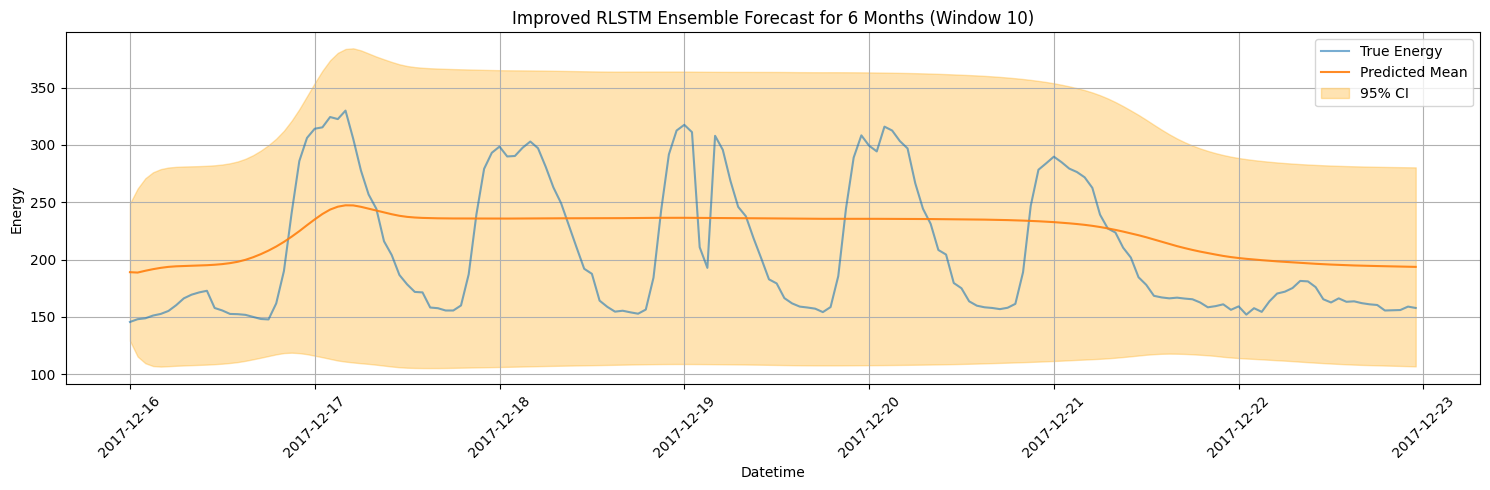

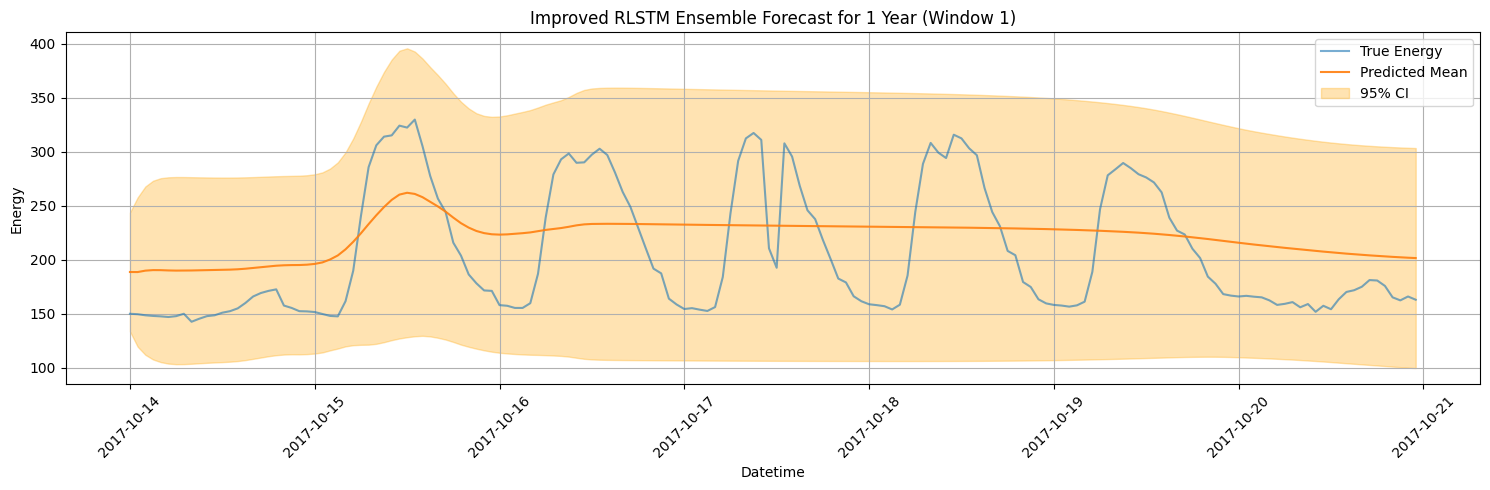

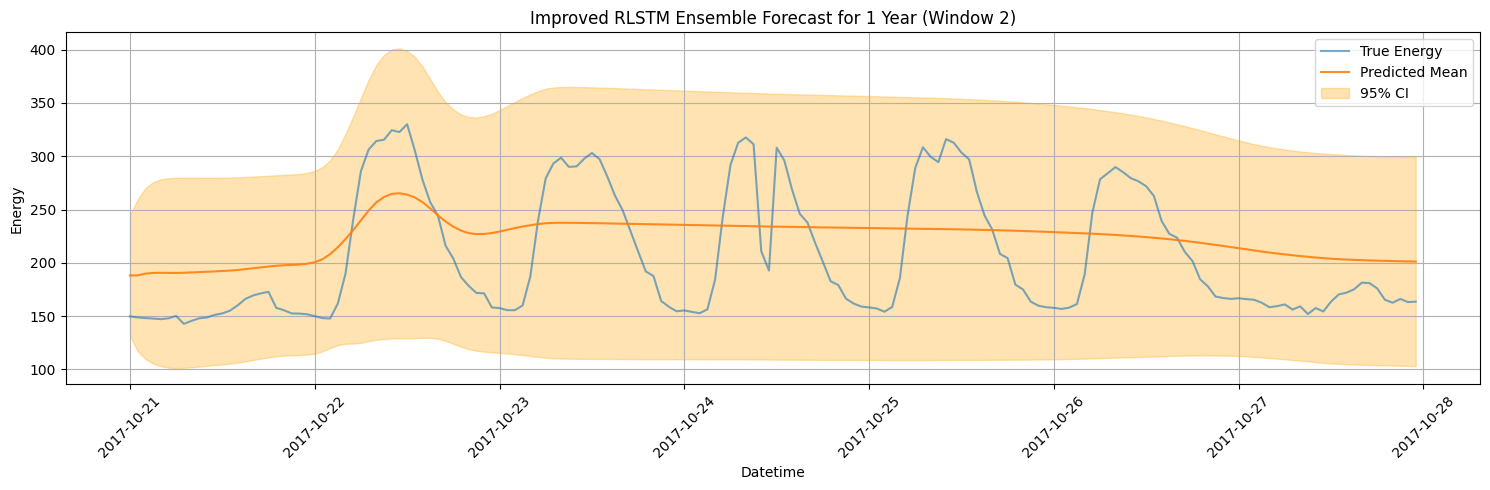

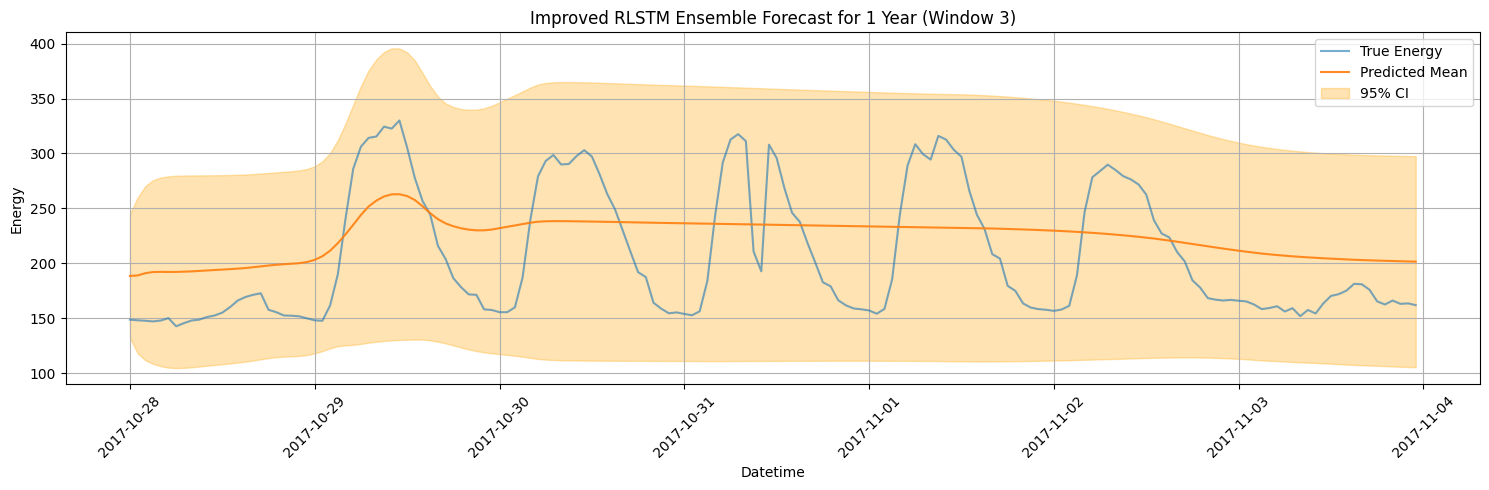

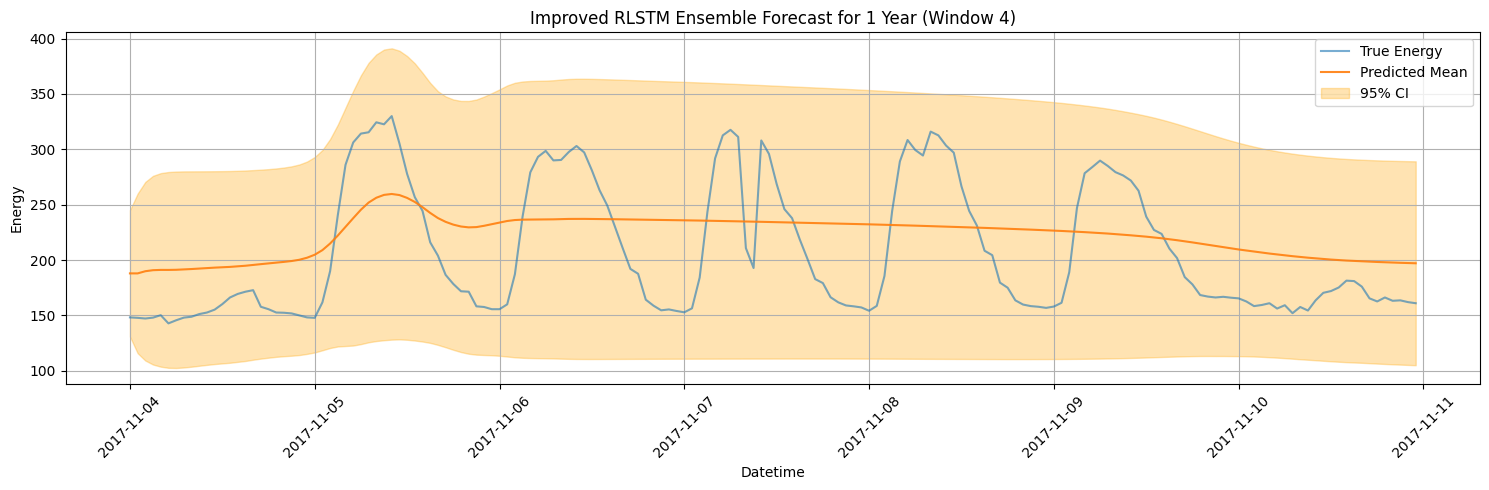

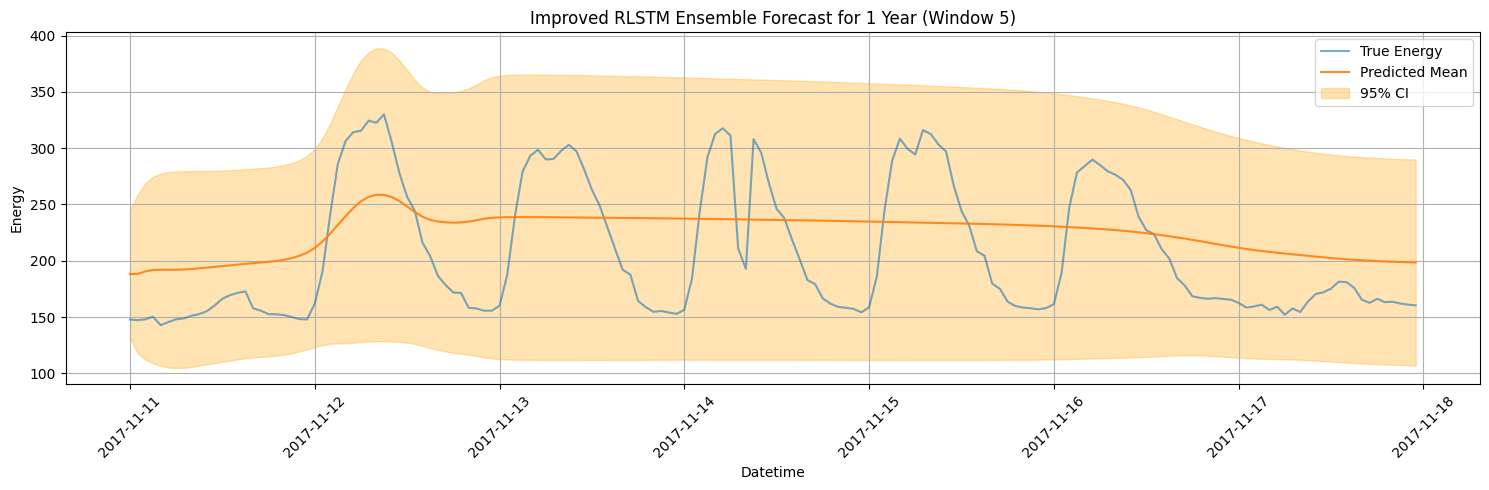

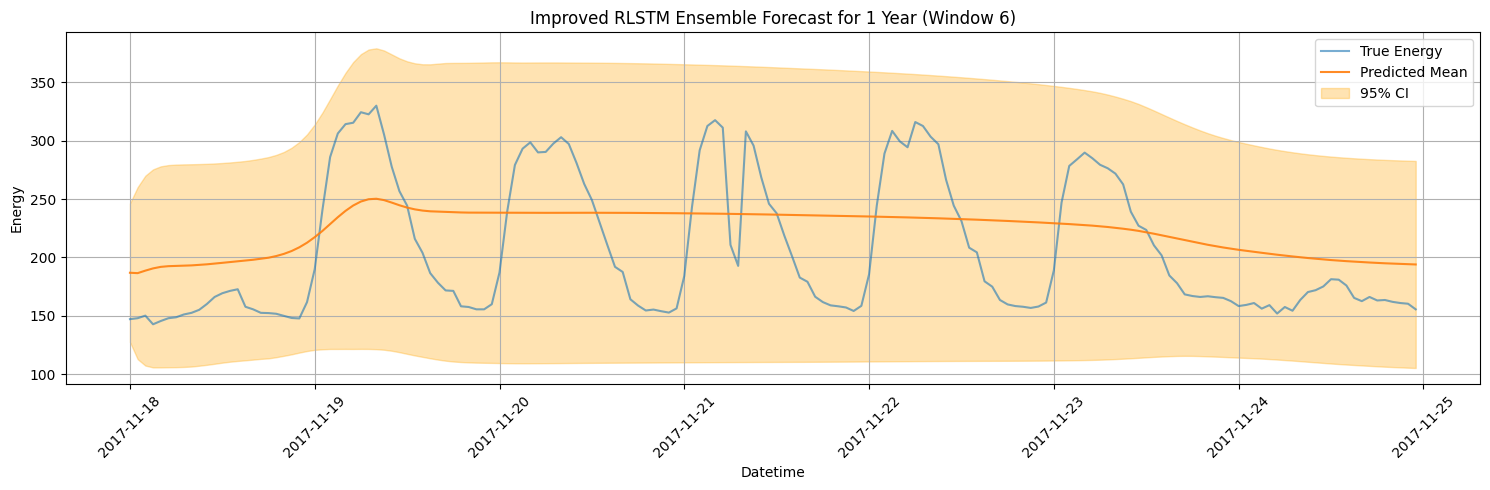

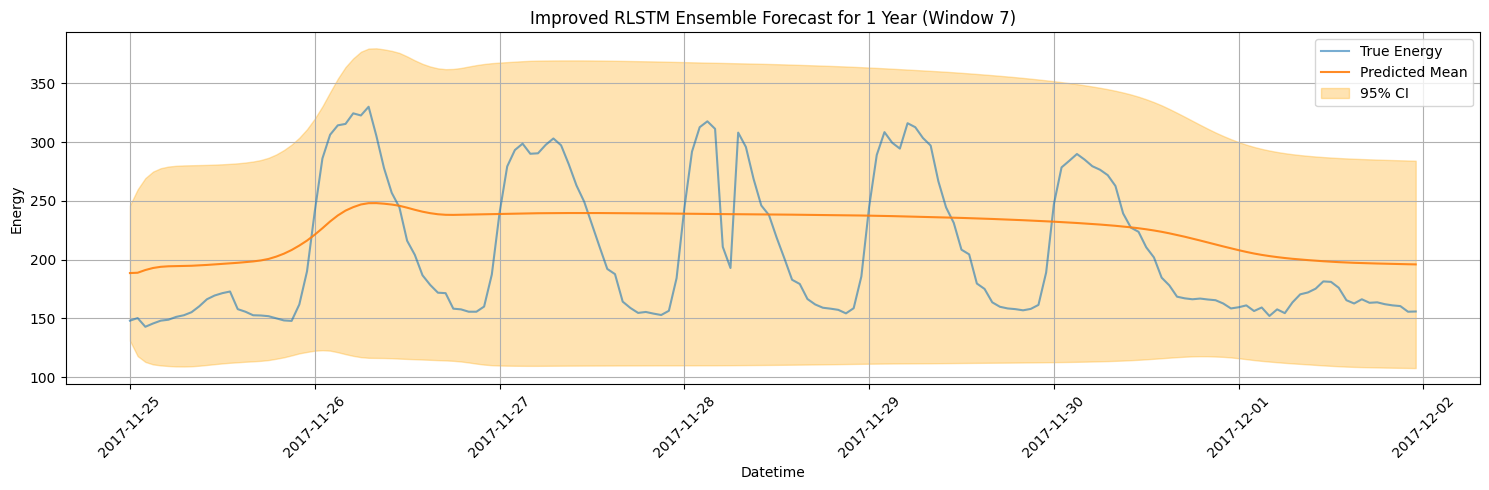

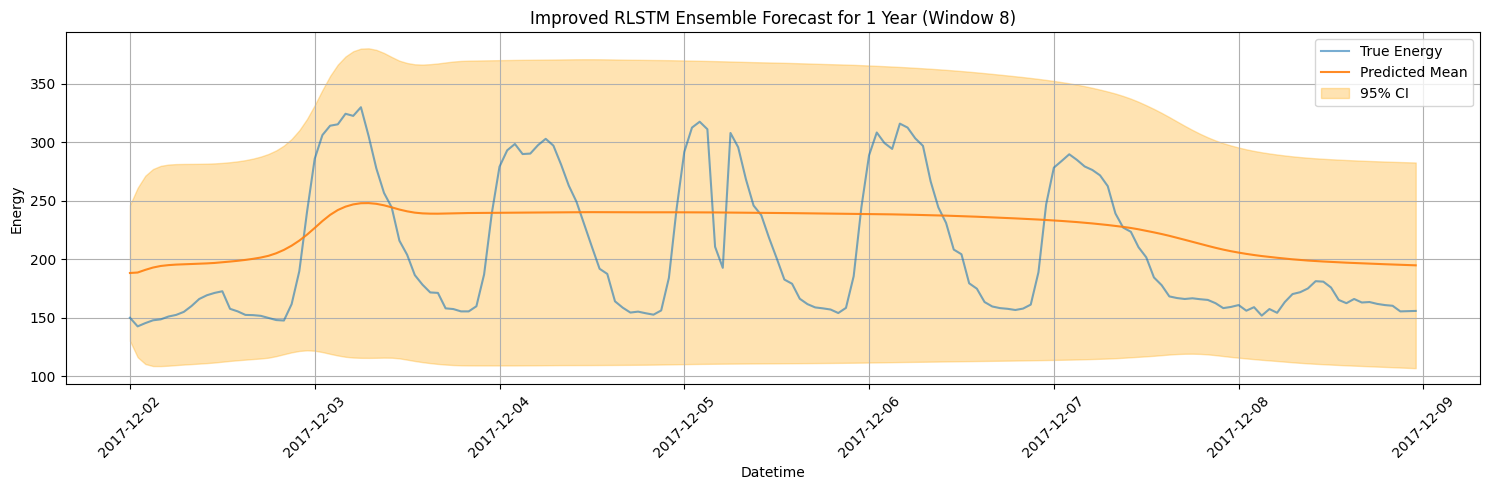

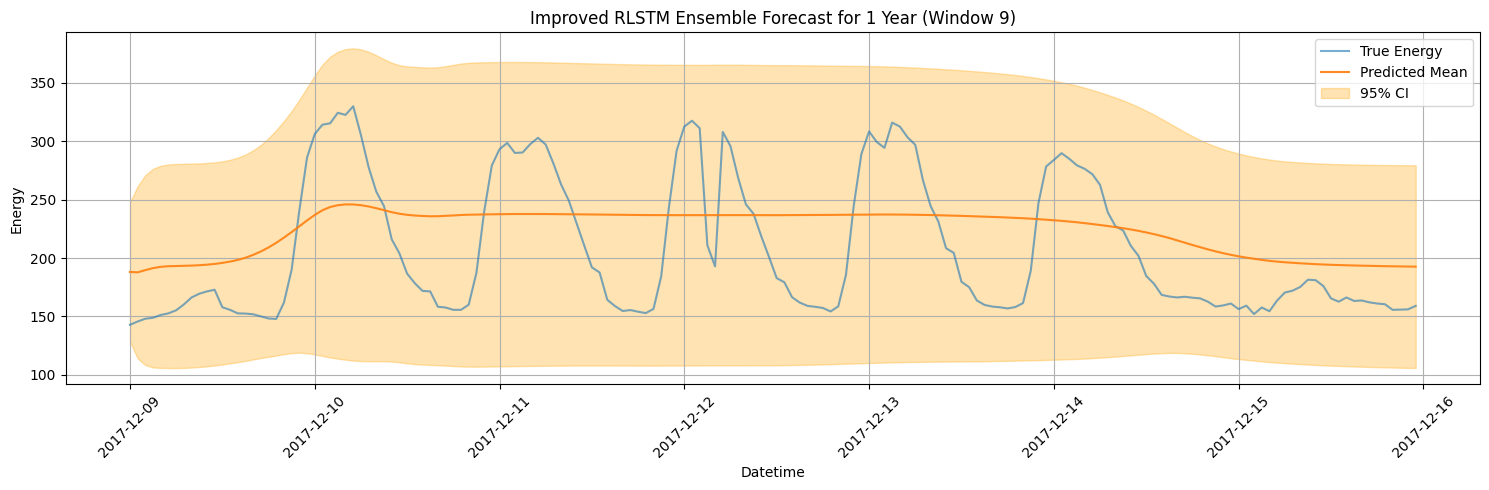

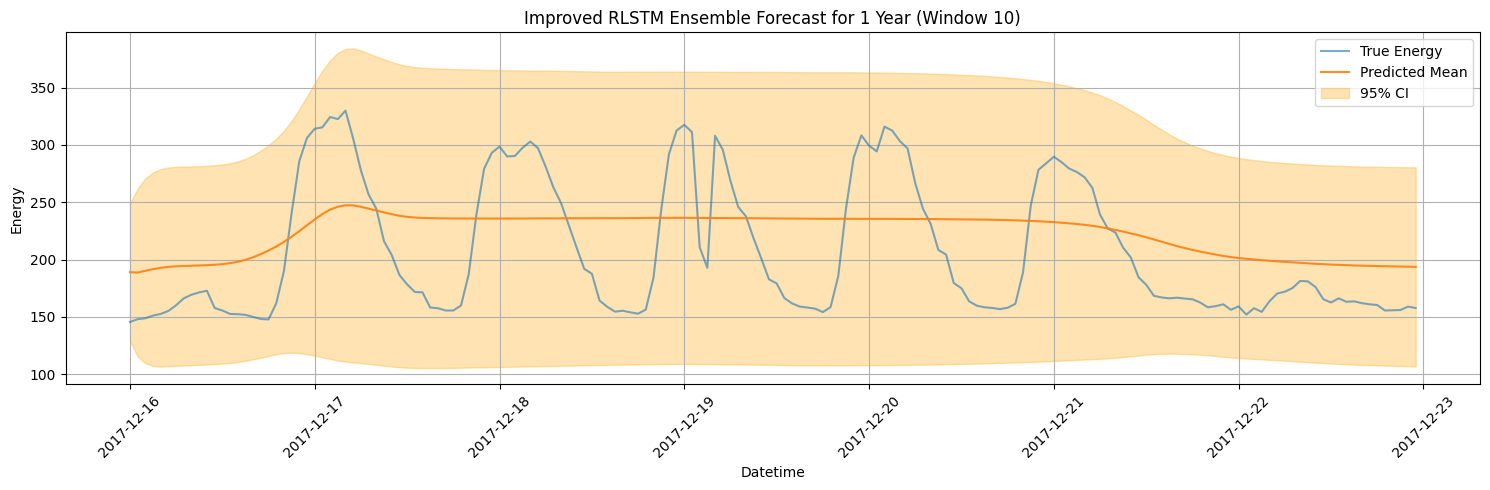

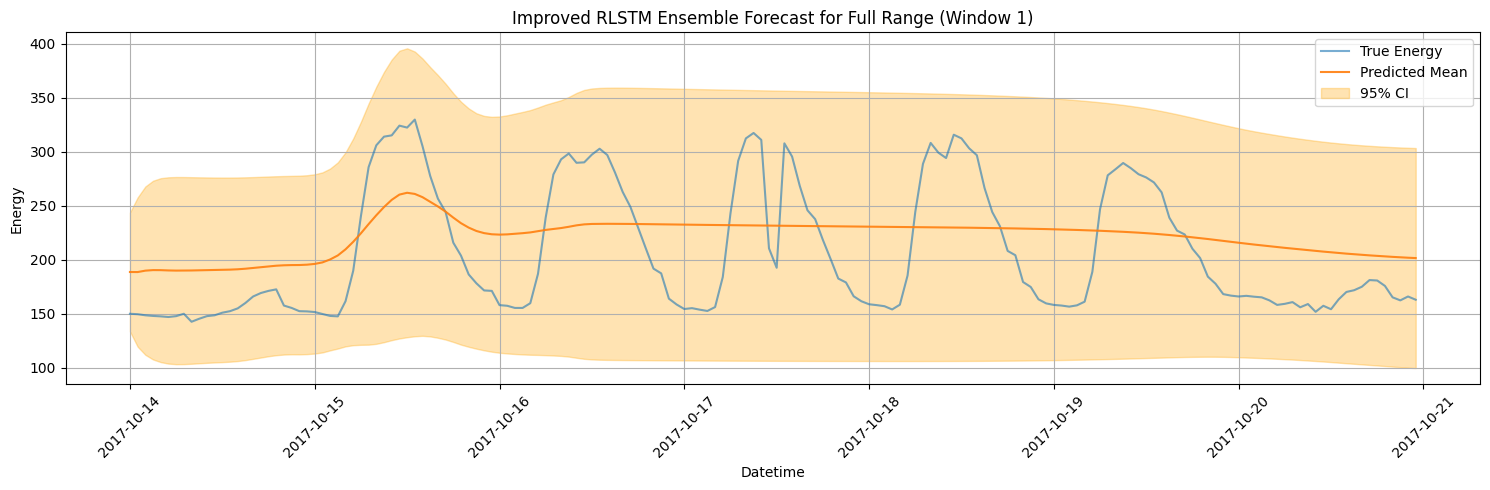

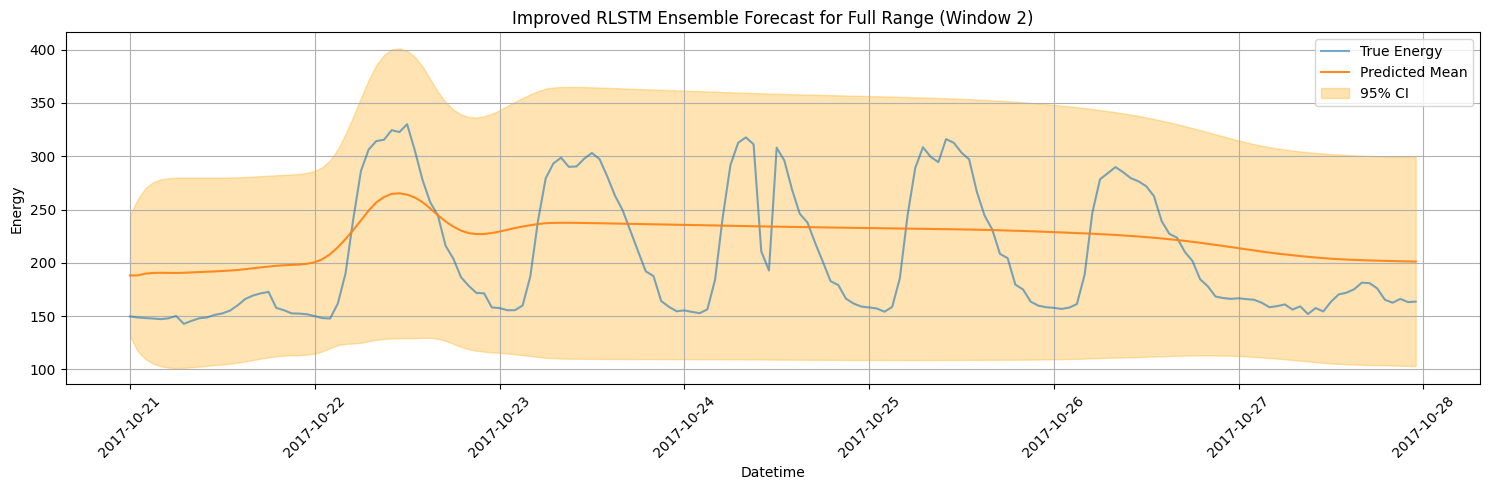

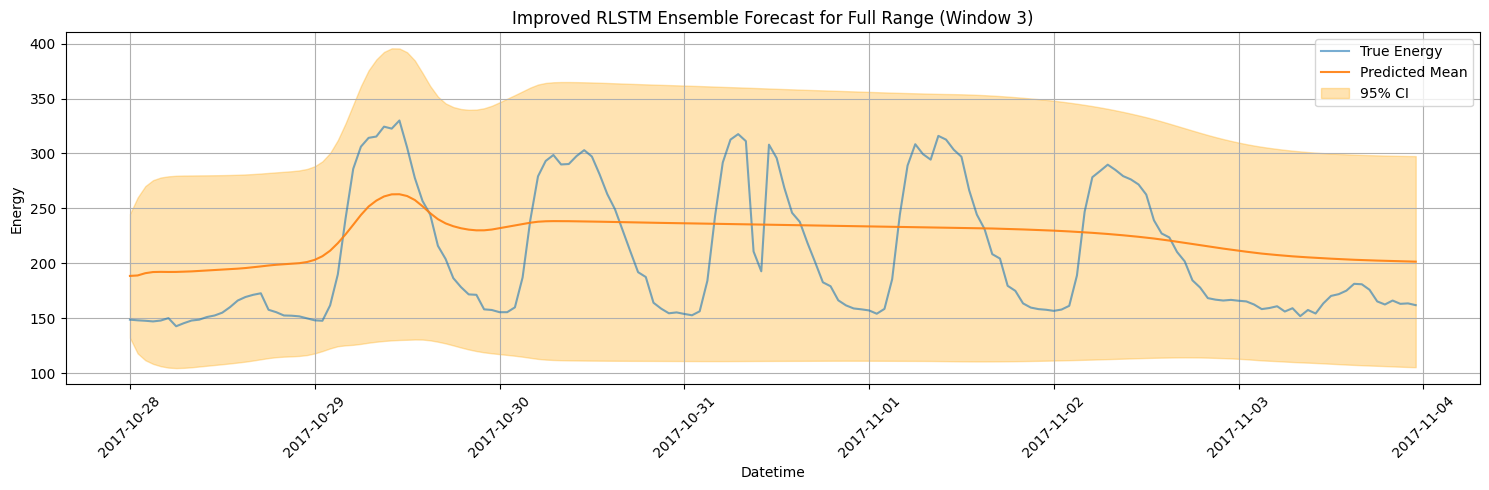

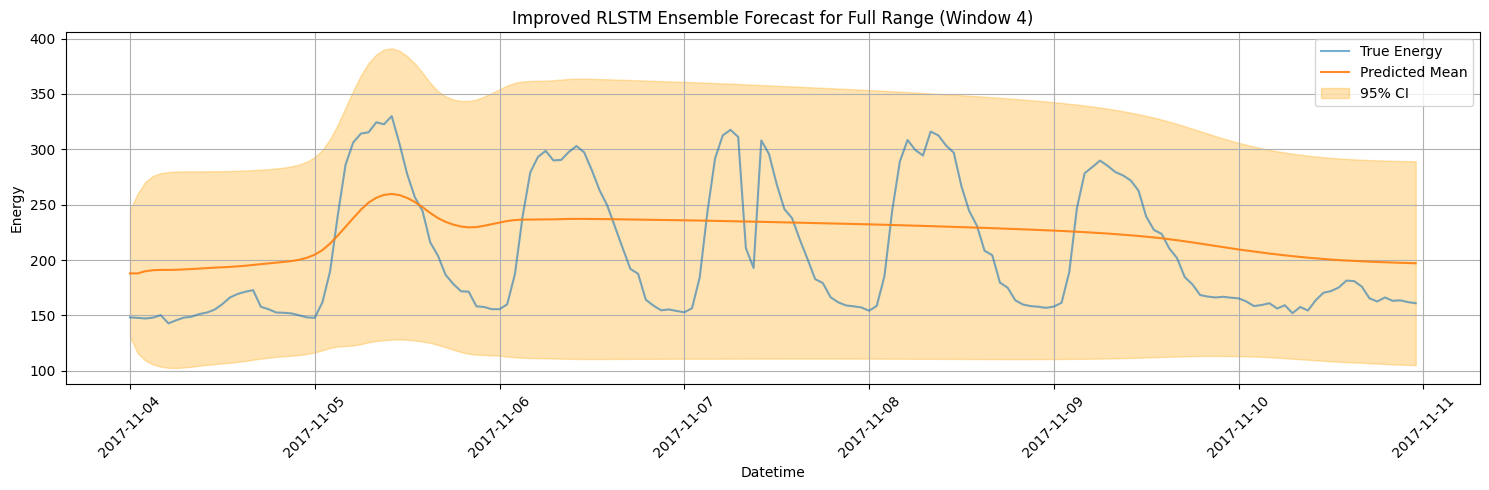

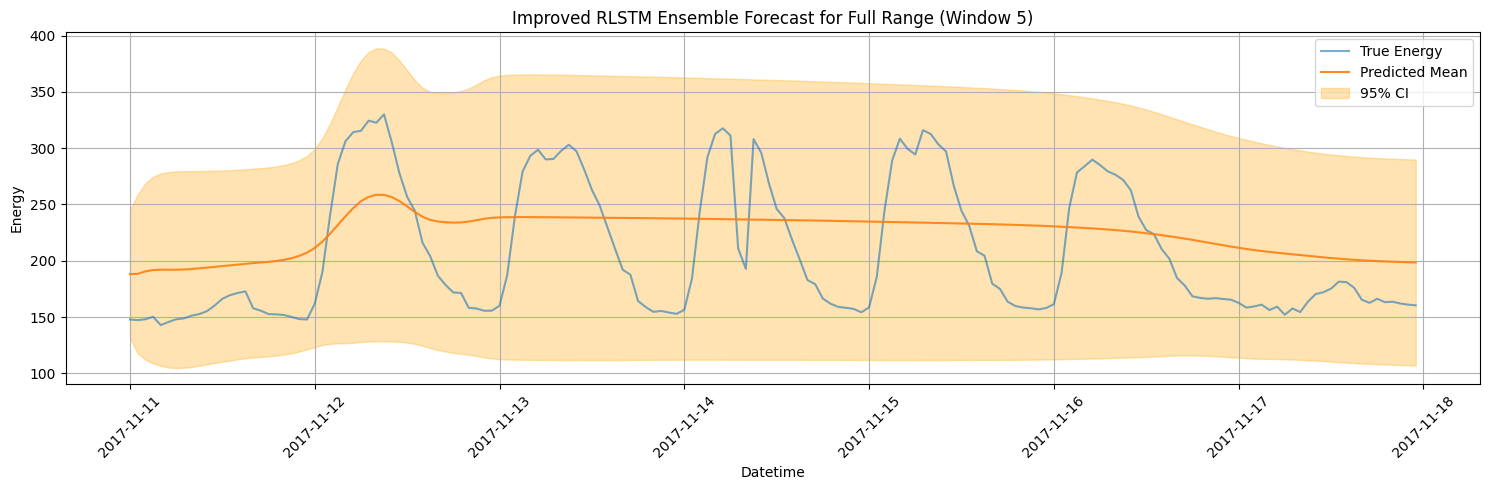

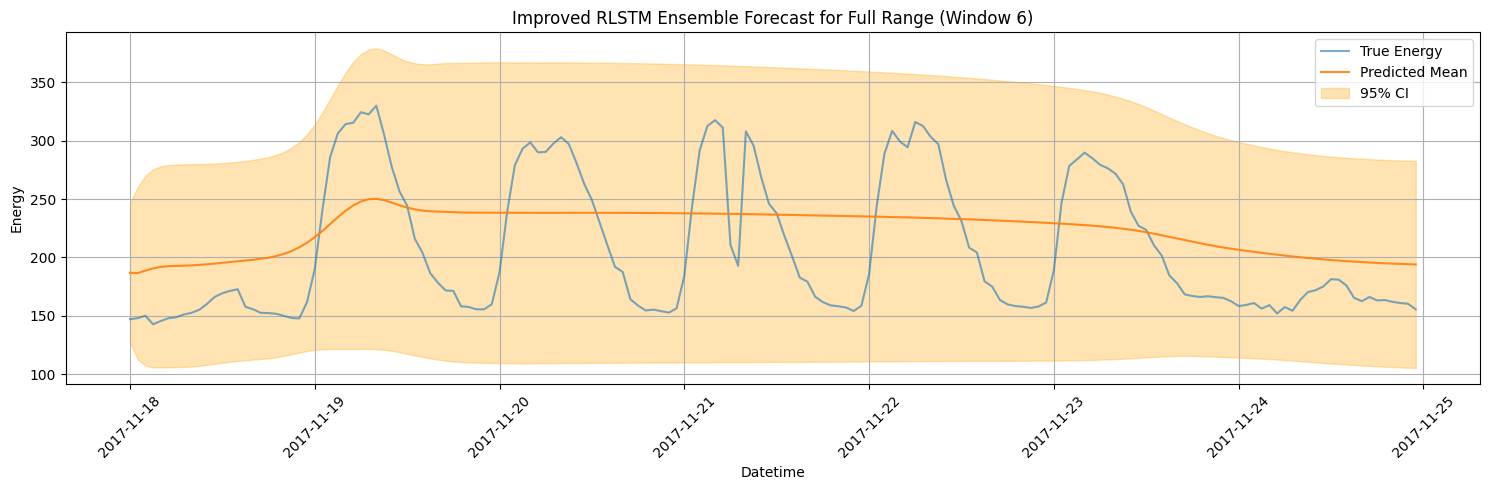

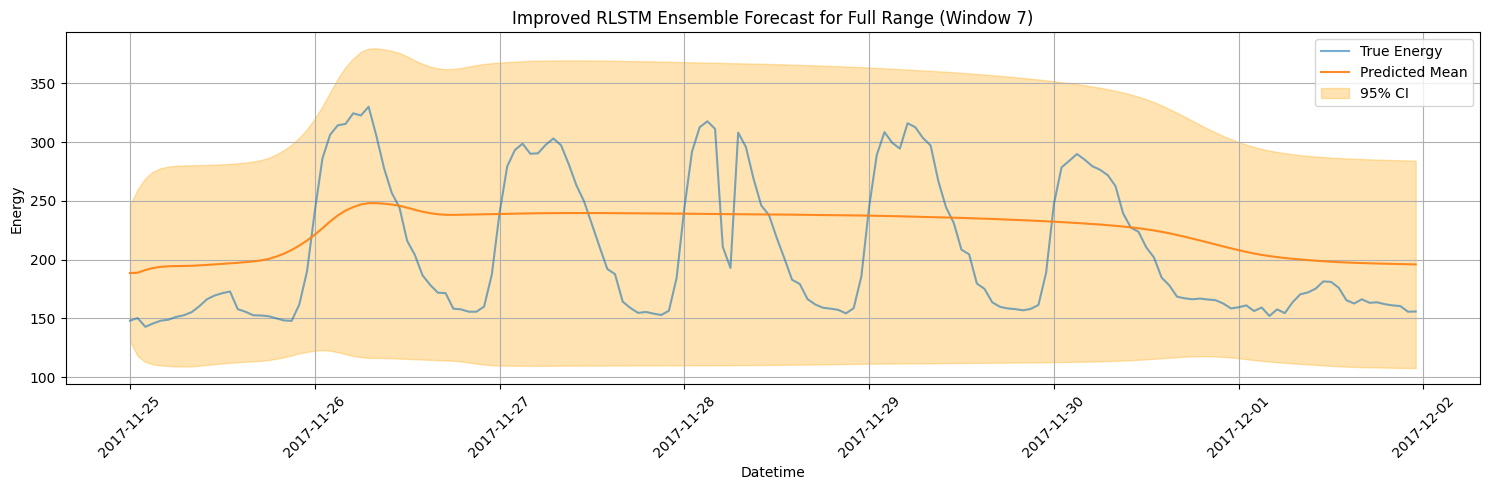

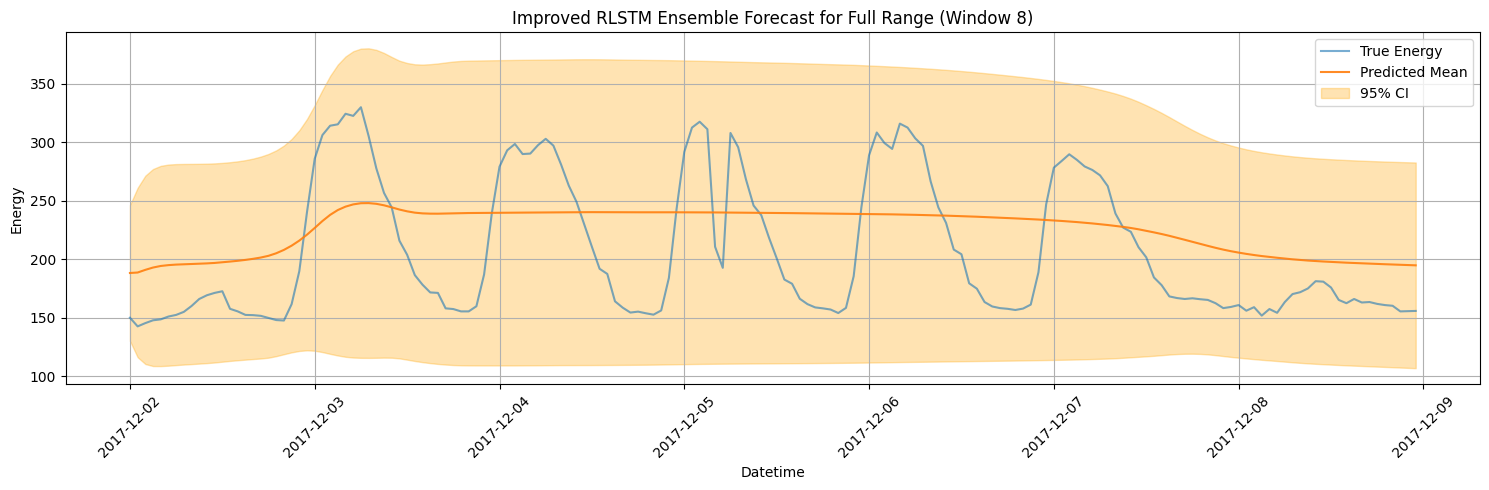

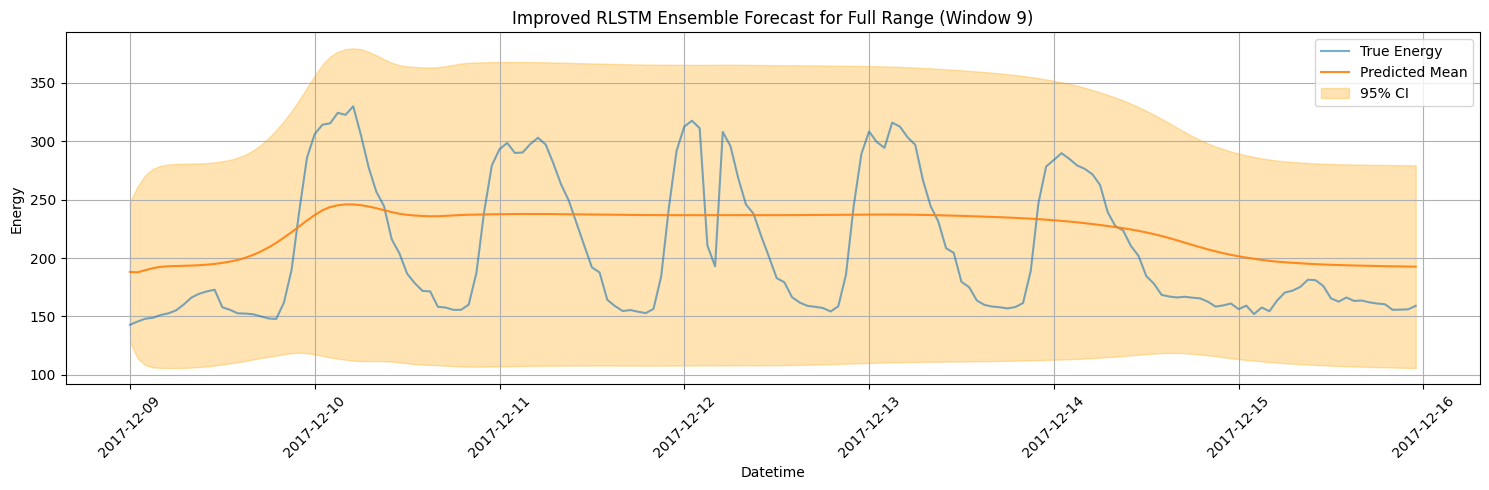

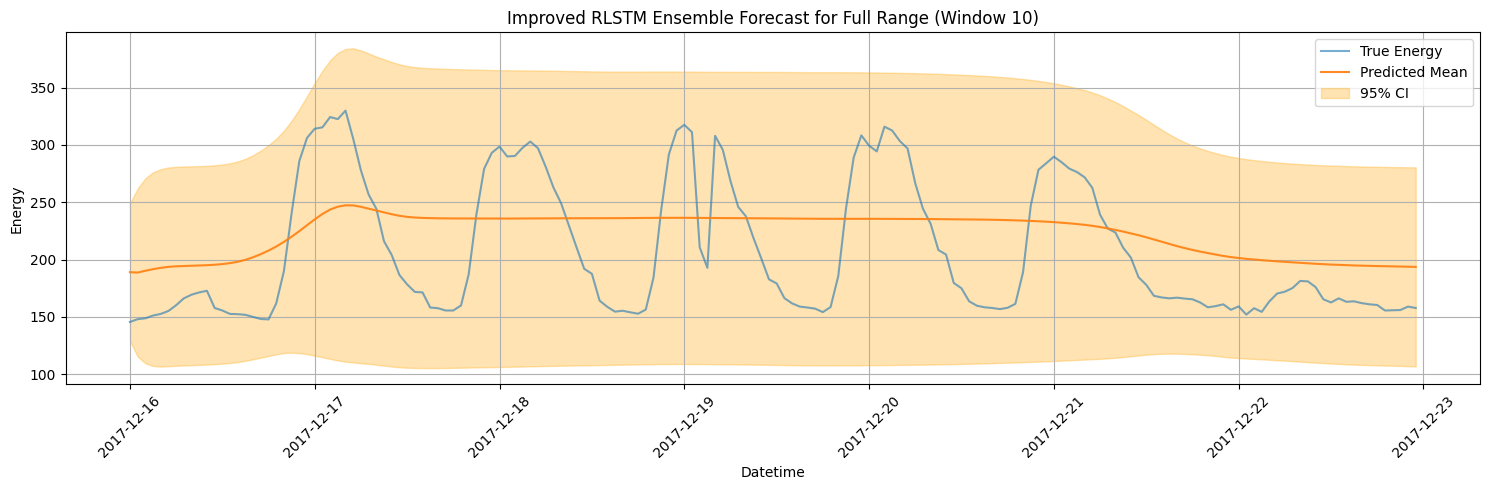

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Input, callbacks
from datetime import timedelta

# --- Hyperparameters ---
lstm_units = 256  # Increased capacity
learning_rate = 1e-4  # Slightly higher learning rate
dense_units = 50  # Increased capacity
lambda_reg = 0.001  # Slightly reduced regularization
input_window = 336  # Extended to 14 days for better context
output_window = 168  # Output: 7 days (one week)
n_ensemble = 5
epochs = 100  # Increased epochs
batch_size = 32
dropout_rate = 0.1  # Reduced dropout
random_seed_base = 42  # Base seed for reproducibility

# --- Selected features ---
selected_features = [
    'air_temperature', 'diffuse_r', 'elspot', 'full_solar', 'global_r',
    'gust_speed', 'relative_humidity', 'sunshine', 'wind_speed', 'hour', 'weekday',
    'month', 'is_weekend', 'is_holiday', 'is_long_holiday', 'avg_temperature',
    'temp_lag1', 'is_peak_hour'
]

# --- Load datasets ---
holidays_df = pd.read_excel("3.Holydays .xlsx")
holidays_df['DateKEY'] = pd.to_datetime(holidays_df['DateKEY'], format='%Y%m%d')
df_Train = pd.read_excel("X_train_scaled.xlsx")
df_Val = pd.read_excel("X_val_scaled.xlsx")
df_Test = pd.read_excel("X_test_scaled.xlsx")

# --- Feature engineering ---
def create_enhanced_features(df, holidays_df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['is_weekend'] = df['datetime'].dt.weekday.isin([5, 6]).astype(int)
    df['is_holiday'] = df['datetime'].dt.date.isin(holidays_df['DateKEY'].dt.date).astype(int)
    df['is_long_holiday'] = df['is_holiday'].rolling(window=7).sum().ffill()
    if 'air_temperature' in df.columns:
        df['avg_temperature'] = df['air_temperature'].rolling(window=7).mean().ffill()
        df['temp_lag1'] = df['air_temperature'].shift(1).ffill()
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df['month'] = df['datetime'].dt.month
    df['is_peak_hour'] = df['hour'].isin([8, 9, 17, 18]).astype(int)
    df[selected_features] = df[selected_features].fillna(df[selected_features].mean())
    return df

df_Train = create_enhanced_features(df_Train, holidays_df)
df_Val = create_enhanced_features(df_Val, holidays_df)
df_Test = create_enhanced_features(df_Test, holidays_df)

# --- Normalize data ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_full = scaler_X.fit_transform(df_Train[selected_features])
X_val_full = scaler_X.transform(df_Val[selected_features])
X_test_full = scaler_X.transform(df_Test[selected_features])
y_train_full = scaler_y.fit_transform(df_Train['energy'].values.reshape(-1, 1))
y_val_full = scaler_y.transform(df_Val['energy'].values.reshape(-1, 1))
y_test_full = scaler_y.transform(df_Test['energy'].values.reshape(-1, 1))

# --- Sliding window for multi-step forecasting ---
def create_sliding_windows(X_full, y_full, input_window, output_window):
    X, y = [], []
    for i in range(len(X_full) - input_window - output_window + 1):
        X.append(X_full[i:i + input_window])
        y.append(y_full[i + input_window:i + input_window + output_window].flatten())
    return np.array(X), np.array(y)

X_train, y_train = create_sliding_windows(X_train_full, y_train_full, input_window, output_window)
X_val, y_val = create_sliding_windows(X_val_full, y_val_full, input_window, output_window)
X_test, y_test = create_sliding_windows(X_test_full, y_test_full, input_window, output_window)
time_test = pd.Series(pd.to_datetime(df_Test['datetime'])[input_window:input_window + len(y_test)])

X_train = X_train.reshape((-1, input_window, len(selected_features)))
X_val = X_val.reshape((-1, input_window, len(selected_features)))
X_test = X_test.reshape((-1, input_window, len(selected_features)))
y_train = y_train.reshape((-1, output_window))
y_val = y_val.reshape((-1, output_window))
y_test = y_test.reshape((-1, output_window))

# --- TensorFlow dataset ---
def create_tf_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    return dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset = create_tf_dataset(X_train, y_train, batch_size)
val_dataset = create_tf_dataset(X_val, y_val, batch_size)

# --- NLL loss with regularization ---
@tf.function
def nll_loss(y_true, y_pred):
    mu = y_pred[:, :, 0]
    log_var = y_pred[:, :, 1]
    var = tf.nn.softplus(log_var) + 1e-6
    nll = tf.reduce_mean(0.5 * (tf.math.log(var) + tf.square(y_true - mu) / var))
    reg = lambda_reg * tf.reduce_mean(log_var ** 2)
    return nll + reg

# --- RLSTM Model with Residual Connection and Projection ---
def build_rlstm_model(input_shape, output_window=168, seed=None):
    tf.random.set_seed(seed)
    inputs = Input(shape=input_shape)
    # Encoder with randomized dropout
    x = layers.LSTM(lstm_units, return_sequences=True, dropout=dropout_rate,
                    kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed))(inputs)
    x = layers.LSTM(lstm_units // 2, return_sequences=False, dropout=dropout_rate,
                    kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed+1))(x)
    # Repeat context for decoder
    x = layers.RepeatVector(output_window)(x)
    # Decoder with residual connection
    decoder_input = layers.LSTM(lstm_units // 2, return_sequences=True, dropout=dropout_rate,
                               kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed+2))(x)
    x = layers.LSTM(lstm_units // 4, return_sequences=True, dropout=dropout_rate,
                    kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed+3))(decoder_input)
    # Projection layer to match shapes for residual connection
    x_residual = layers.TimeDistributed(layers.Dense(lstm_units // 2, activation='relu',
                          kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed+4)))(x)
    x = layers.Add()([decoder_input, x_residual])  # Residual connection
    x = layers.TimeDistributed(layers.Dense(dense_units, activation='relu',
                     kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed+5)))(x)
    outputs = layers.TimeDistributed(layers.Dense(2, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed+6),
                          bias_initializer=tf.keras.initializers.Constant(value=[0.0, -3.0])))(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizers.Adam(learning_rate), loss=nll_loss)
    return model

# --- Train ensemble ---
ensemble_models = []
for i in range(n_ensemble):
    print(f"Training RLSTM model {i+1}/{n_ensemble}")
    model = build_rlstm_model((input_window, len(selected_features)), output_window=output_window, seed=random_seed_base + i)
    model.fit(train_dataset, validation_data=val_dataset, epochs=epochs,
              callbacks=[
                  callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6),
                  callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, min_delta=0.001)
              ], verbose=1)
    ensemble_models.append(model)

# --- Prediction with uncertainty ---
def predict_with_total_variance(ensemble_models, X_test, n_samples=10):
    all_preds = []
    for model in ensemble_models:
        model_preds = []
        for _ in range(n_samples):  # Monte Carlo Dropout
            pred = model(X_test, training=True).numpy()  # Enable dropout during inference
            model_preds.append(pred)
        all_preds.append(np.mean(model_preds, axis=0))  # Average predictions for this model
    mu_m = np.array([pred[:, :, 0] for pred in all_preds])
    log_var_m = np.array([pred[:, :, 1] for pred in all_preds])
    var_m = tf.nn.softplus(log_var_m) + 1e-6
    mean_mu = np.mean(mu_m, axis=0)
    mean_var = np.mean(var_m, axis=0)
    var_between = np.var(mu_m, axis=0)
    total_var = mean_var + var_between
    std = np.sqrt(total_var)
    return mean_mu, std

mean_pred, std_pred = predict_with_total_variance(ensemble_models, X_test)

# --- Inverse transform ---
mean_pred = scaler_y.inverse_transform(mean_pred.reshape(-1, output_window)).reshape(-1, output_window)
y_test = scaler_y.inverse_transform(y_test.reshape(-1, output_window)).reshape(-1, output_window)
std_pred = std_pred.reshape(-1, output_window) * scaler_y.scale_[0]
total_var = std_pred ** 2

# --- Evaluation ---
mae = mean_absolute_error(y_test.flatten(), mean_pred.flatten())
rmse = np.sqrt(mean_squared_error(y_test.flatten(), mean_pred.flatten()))
nll = np.mean(0.5 * (np.log(total_var.flatten()) + (y_test.flatten() - mean_pred.flatten())**2 / total_var.flatten()) + 0.5 * np.log(2 * np.pi))
print(f"\n📊 Improved RLSTM Ensemble Evaluation (7-day Forecast)")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"NLL:  {nll:.2f}")

# --- Plot: 1 Week Forecast ---
week_indices = slice(0, output_window)  # First week
time_week = time_test[week_indices]
true_week = y_test[0]  # First sample's true values
mean_week = mean_pred[0]  # First sample's predicted mean
std_week = std_pred[0]  # First sample's standard deviation

plt.figure(figsize=(15, 5))
plt.plot(time_week, true_week, label="True Energy", alpha=0.6)
plt.plot(time_week, mean_week, label="Predicted Mean", alpha=0.9)
plt.fill_between(time_week, mean_week - 1.96 * std_week, mean_week + 1.96 * std_week,
                 color='orange', alpha=0.3, label="95% CI")
plt.title("Improved RLSTM Ensemble Forecast for 1 Week")
plt.xlabel("Datetime")
plt.ylabel("Energy")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot: Multiple Time Horizons ---
time_spans = {
    '1 Week': timedelta(weeks=1),
    '2 Weeks': timedelta(weeks=2),
    '1 Month': timedelta(days=30),
    '3 Months': timedelta(days=90),
    '6 Months': timedelta(days=180),
    '1 Year': timedelta(days=365),
    'Full Range': time_test.iloc[-1] - time_test.iloc[0]
}

for label, delta in time_spans.items():
    start_time = time_test.iloc[0]
    end_time = start_time + delta
    mask = (time_test >= start_time) & (time_test <= end_time)
    if mask.sum() < output_window:
        continue
    time_range = time_test[mask]
    n_windows = len(time_range) // output_window
    for i in range(n_windows):
        start_idx = i * output_window
        end_idx = (i + 1) * output_window
        if end_idx > len(time_range):
            break
        time_window = time_range[start_idx:end_idx]
        true_values = y_test[i]  # Use corresponding sample
        mean_values = mean_pred[i]
        std_values = std_pred[i]

        plt.figure(figsize=(15, 5))
        plt.plot(time_window, true_values, label="True Energy", alpha=0.6)
        plt.plot(time_window, mean_values, label="Predicted Mean", alpha=0.9)
        plt.fill_between(time_window, mean_values - 1.96 * std_values, mean_values + 1.96 * std_values,
                         color='orange', alpha=0.3, label="95% CI")
        plt.title(f"Improved RLSTM Ensemble Forecast for {label} (Window {i+1})")
        plt.xlabel("Datetime")
        plt.ylabel("Energy")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()